In [1]:
!pip install catboost
!pip install --upgrade mlxtend
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install sweetviz #EDA Report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.1 MB/s eta 0:00:00


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD
from imblearn.over_sampling import SMOTE
import sweetviz as sv

In [3]:
df = pd.read_csv(r'data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                 1.0   
1                                           0.570175                 1.0   
2                                           0.563706                 1.0   
3                                           0.564663                 1.0   
4                        

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
print("=========== null of dataset================== ")
print(df.isnull().values.any())
print("=========== Sum Duplicate of dataset================== ")
df[df.duplicated()]

=========== null of dataset================== 
False
=========== Sum Duplicate of dataset================== 


Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

[0 rows x 96 columns]

In [ ]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
X = df.drop('Bankrupt?', axis=1).reset_index(drop=True)
y = df['Bankrupt?'].reset_index(drop=True)

In [ ]:
# SMOTE on Datasets
sm = SMOTE(random_state = 2)
X_smote, y_smote = sm.fit_resample(X, y.ravel())

# Give back value after SMOTE to df
df = X_smote
df['Bankrupt'] = y_smote

In [ ]:
df['Bankrupt'].value_counts()

1    6599
0    6599
Name: Bankrupt, dtype: int64

In [ ]:
print("=========== Sum null of dataset================== ")
print(df.isnull().values.any())
print("=========== Sum Duplicate of dataset================== ")
df[df.duplicated()]

=========== Sum null of dataset================== 
False
=========== Sum Duplicate of dataset================== 


Empty DataFrame
Columns: [ ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability, Bankrupt]
Index: []

[0 rows x 96 columns]

<Axes: >

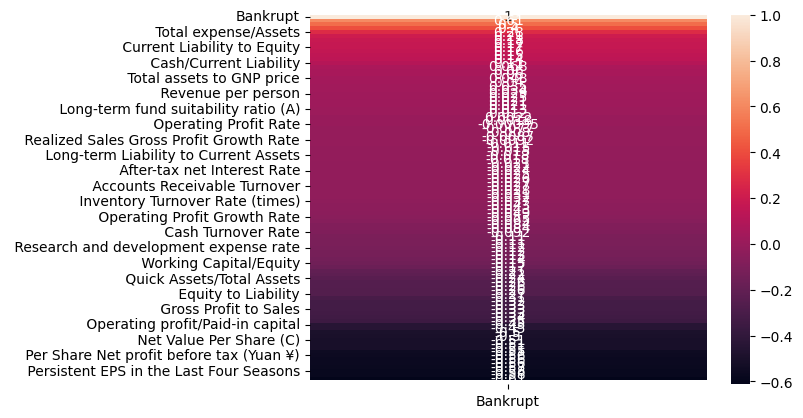

In [ ]:
corr = df.corr()[['Bankrupt']].sort_values(by='Bankrupt', ascending=False)
sns.heatmap(corr, annot=True)

<ipython-input-12-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


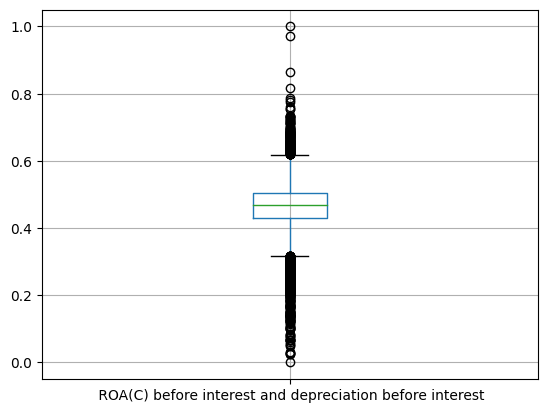

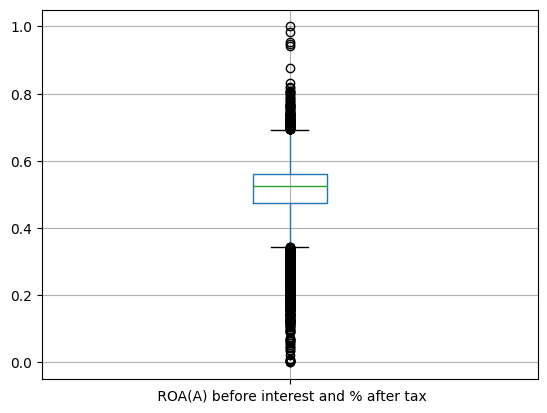

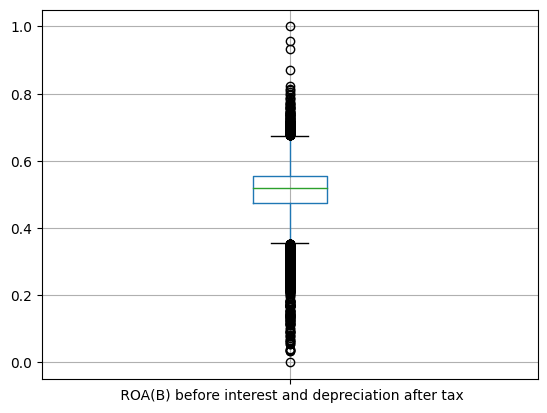

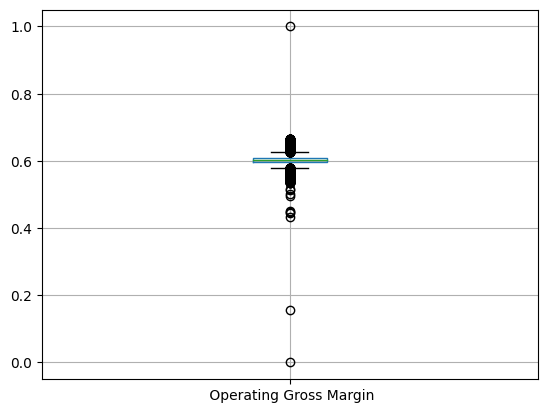

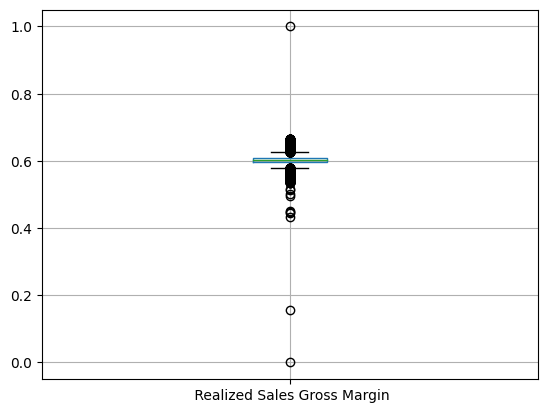

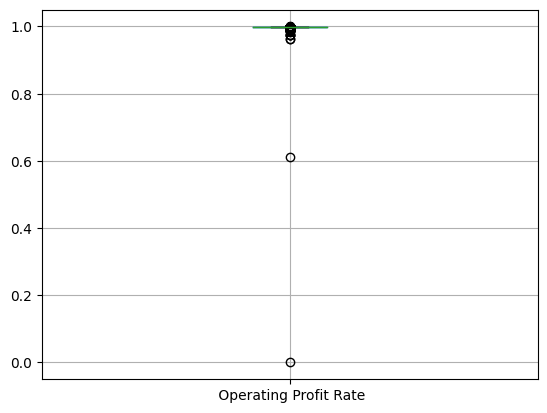

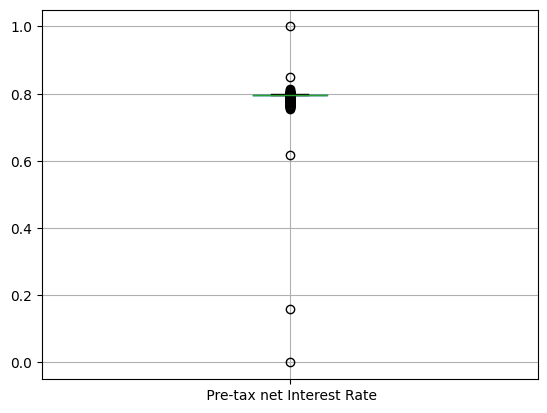

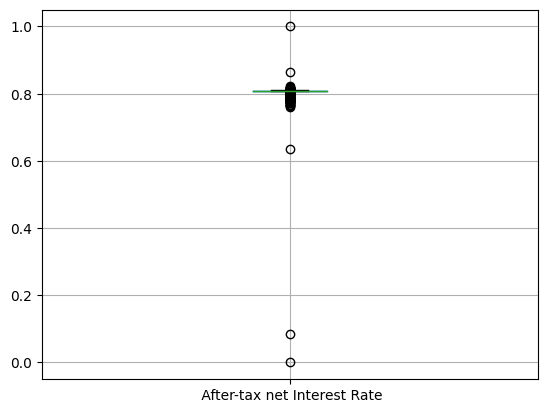

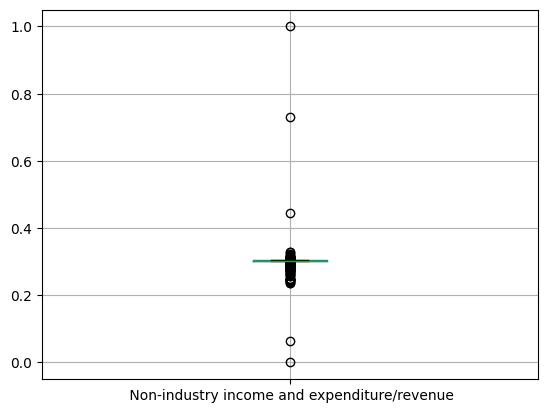

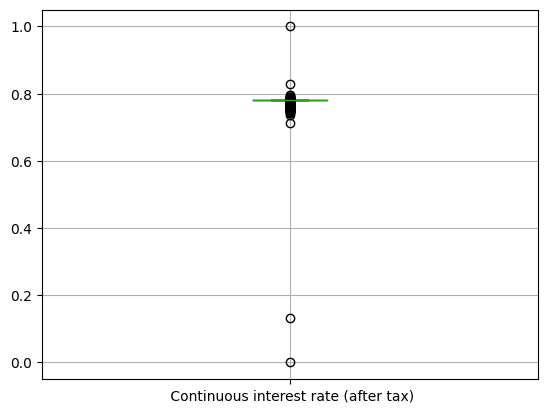

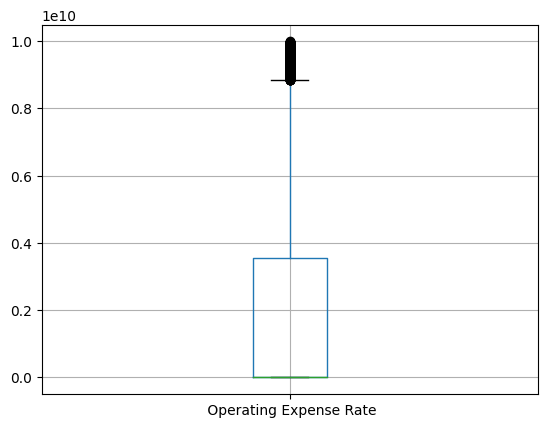

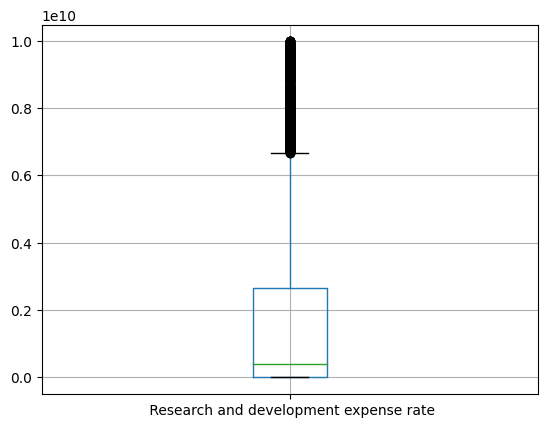

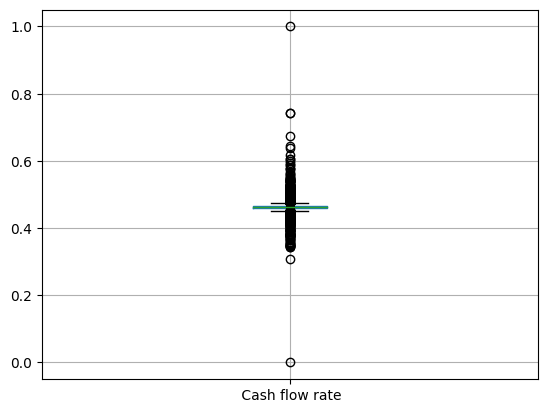

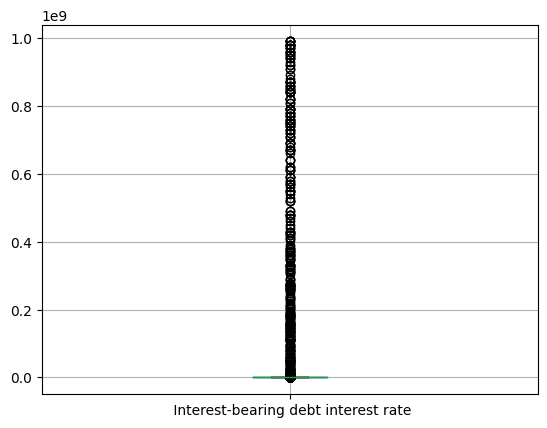

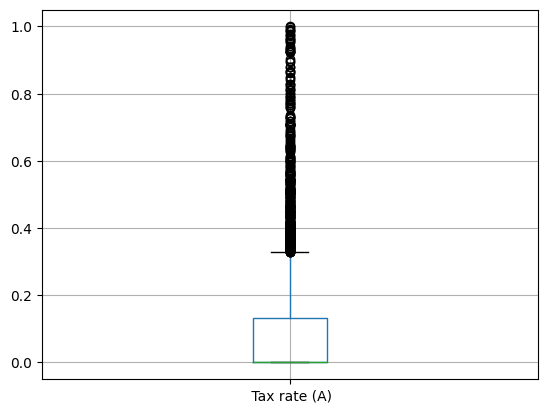

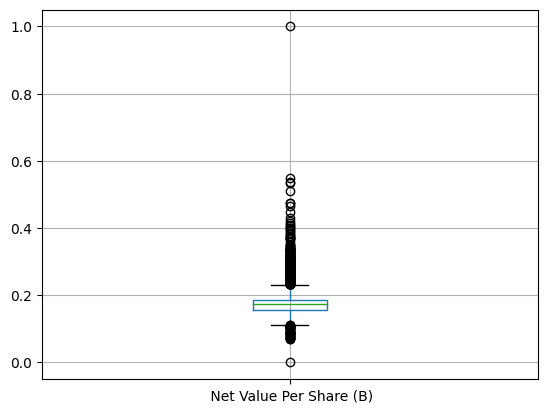

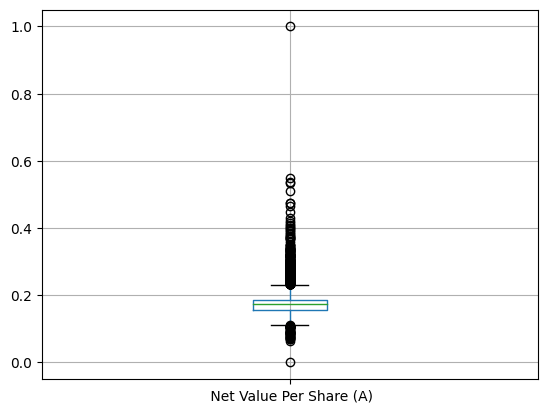

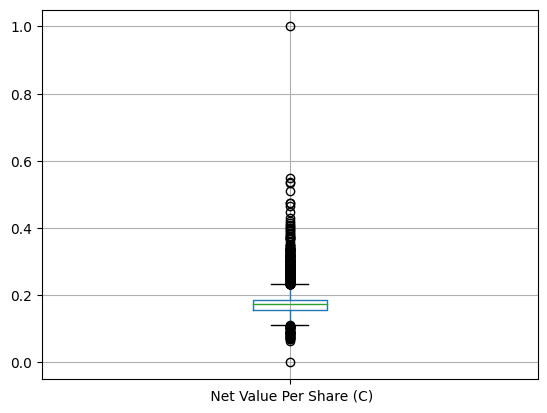

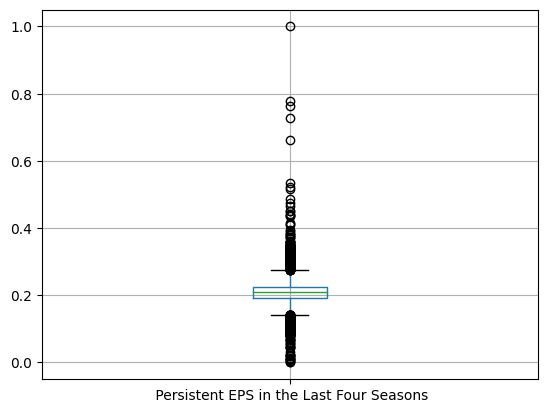

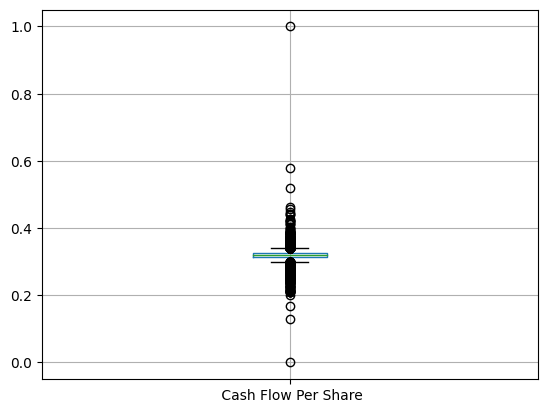

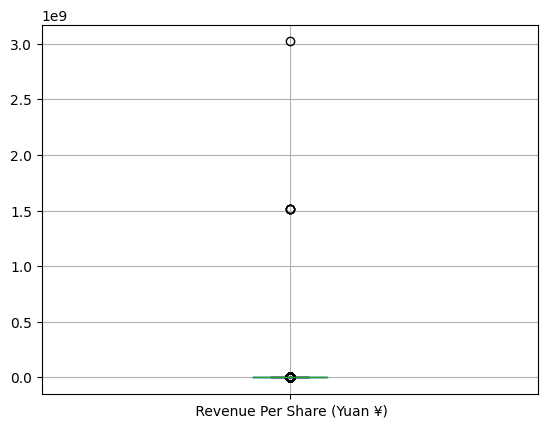

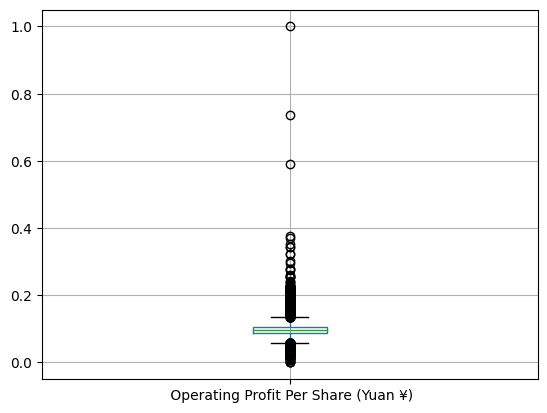

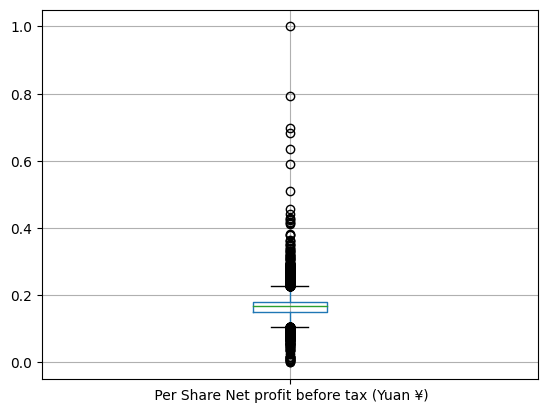

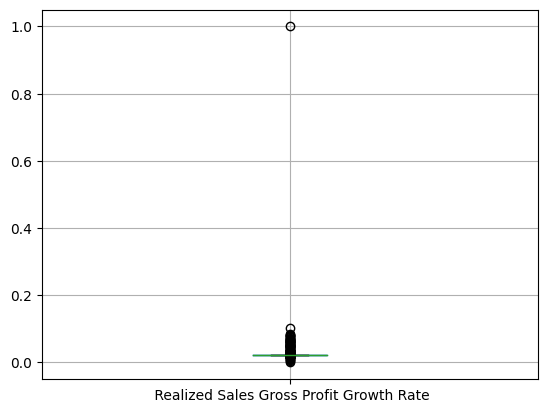

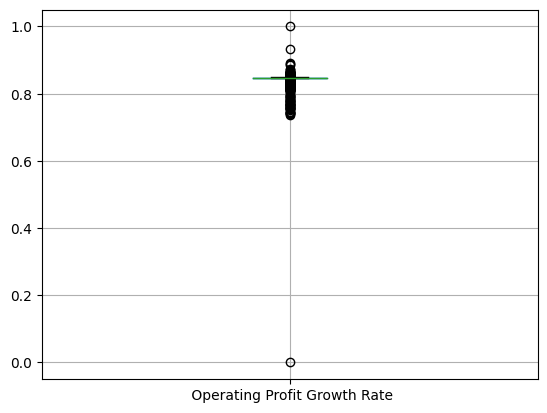

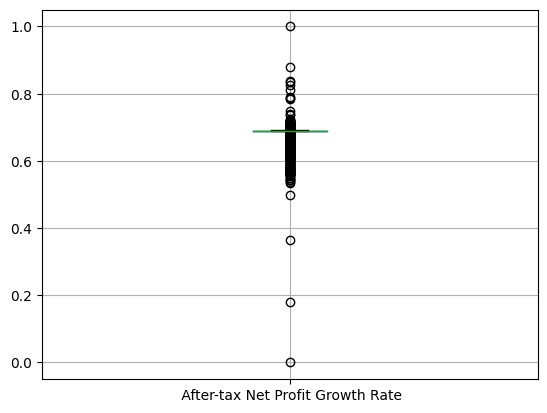

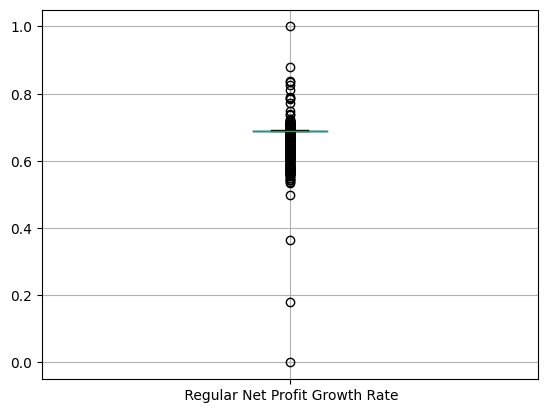

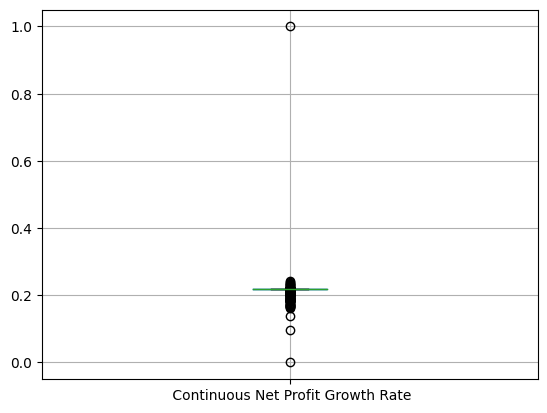

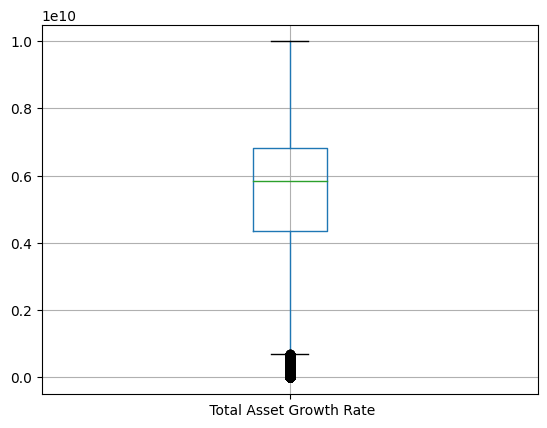

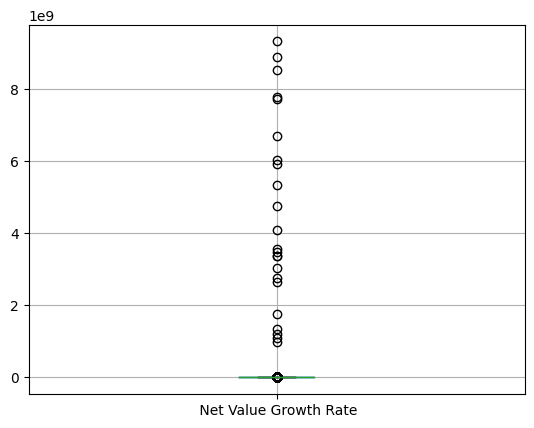

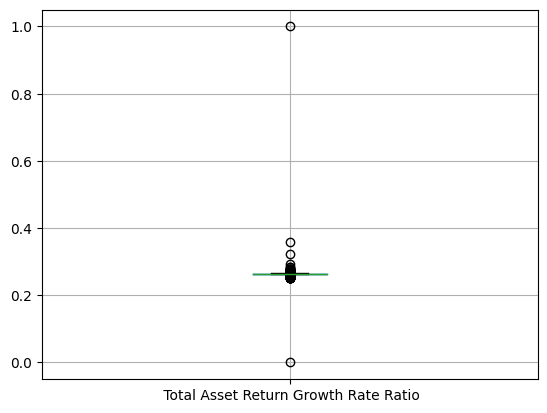

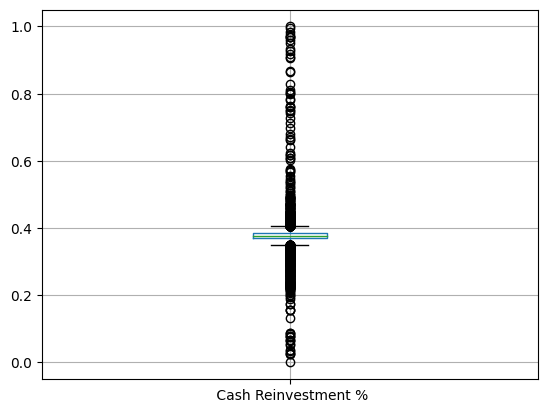

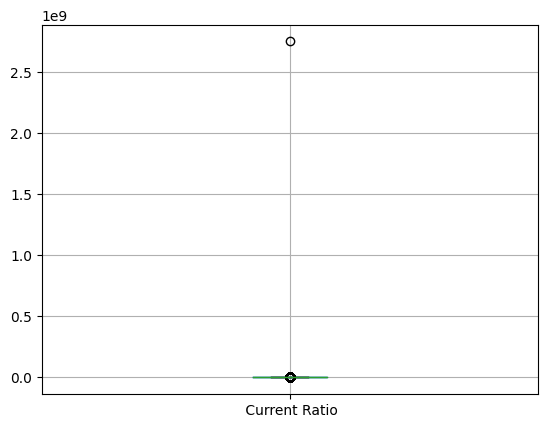

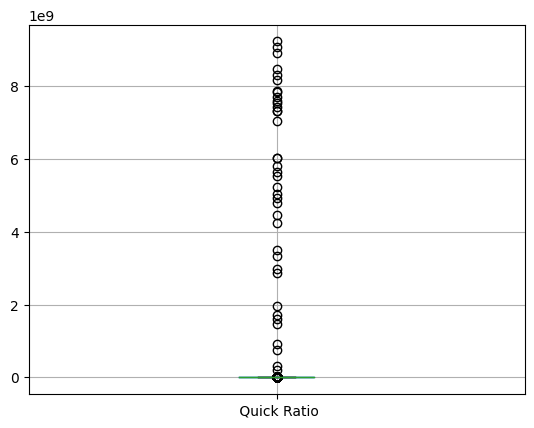

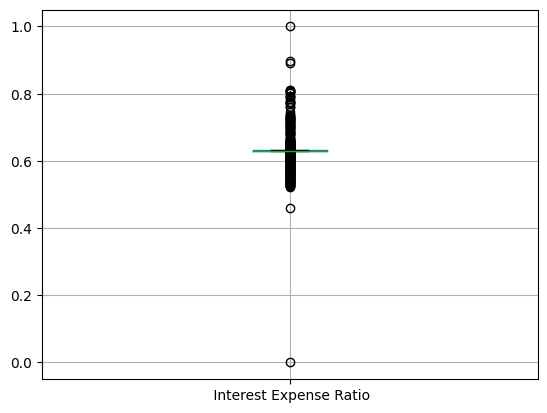

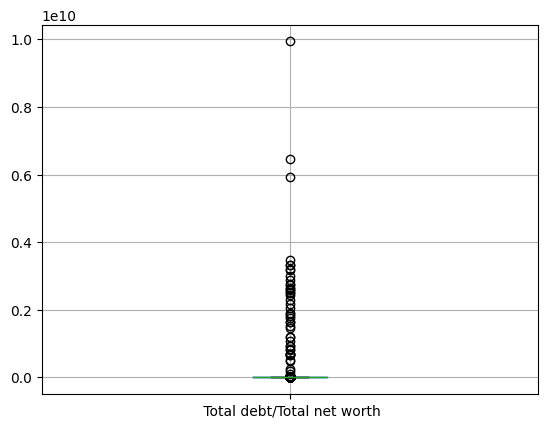

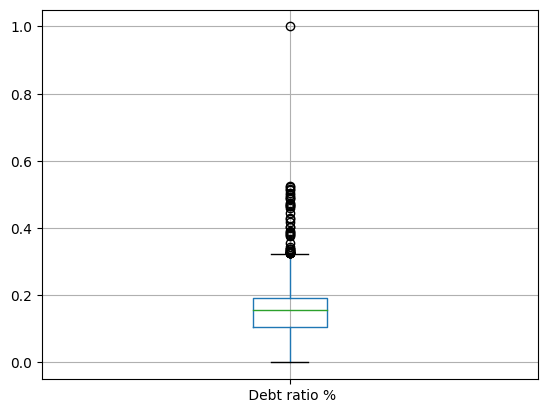

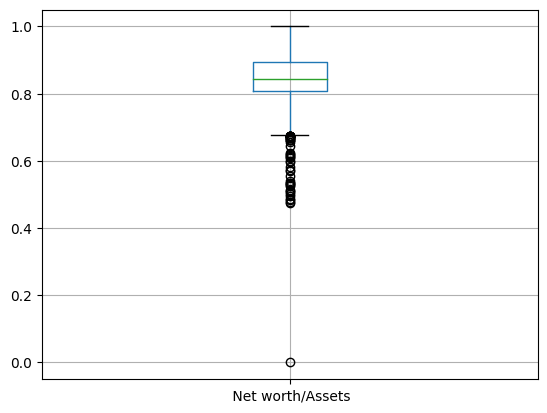

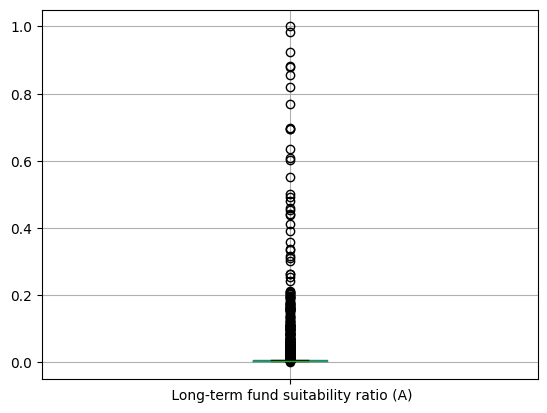

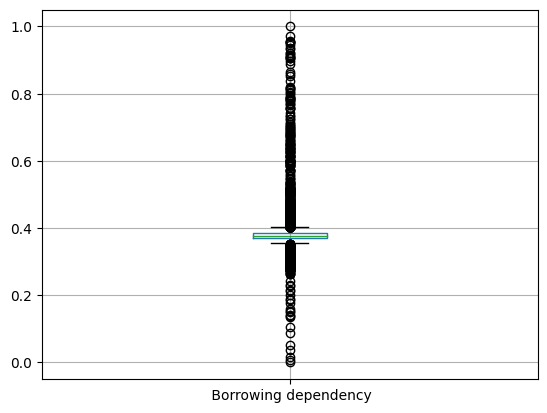

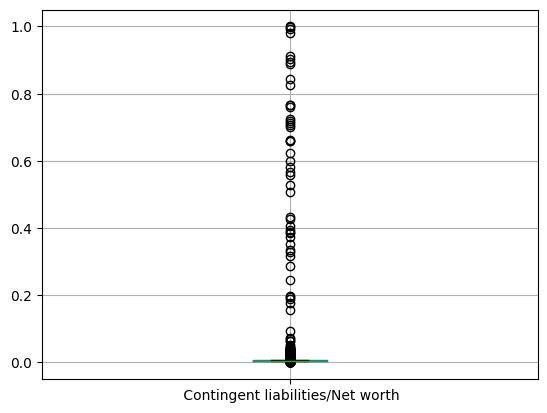

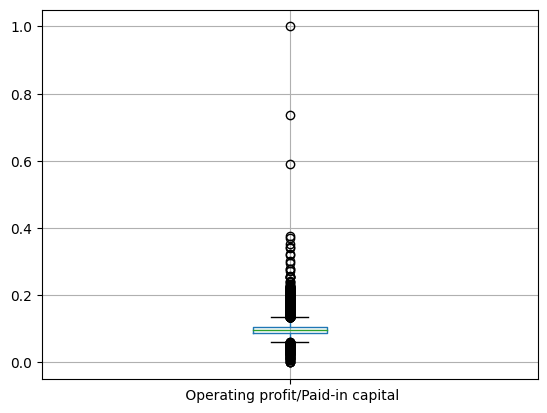

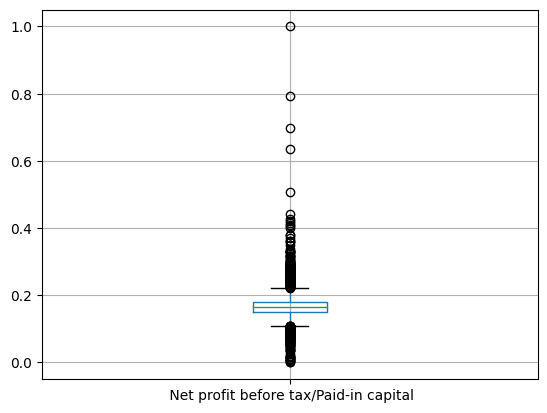

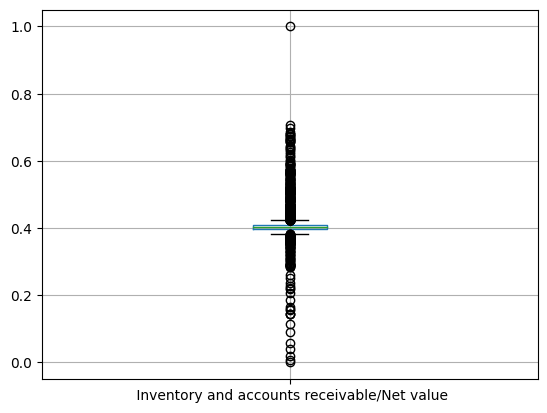

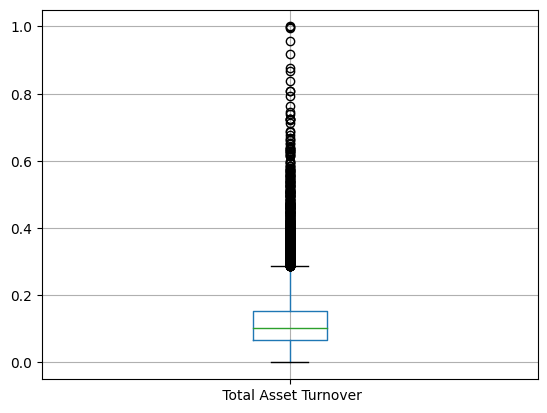

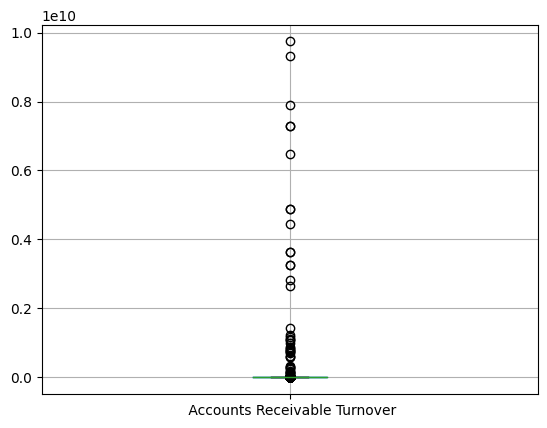

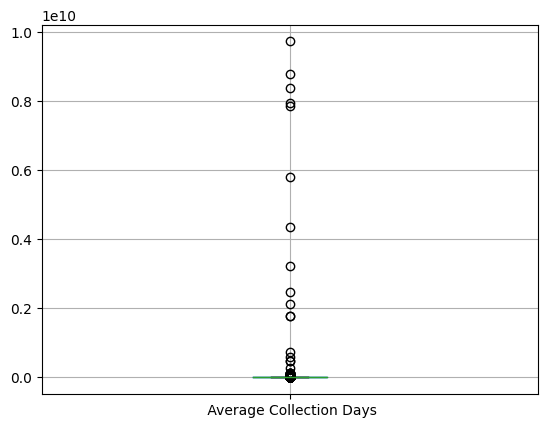

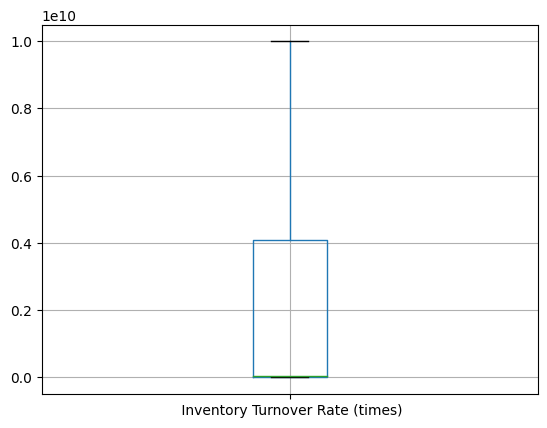

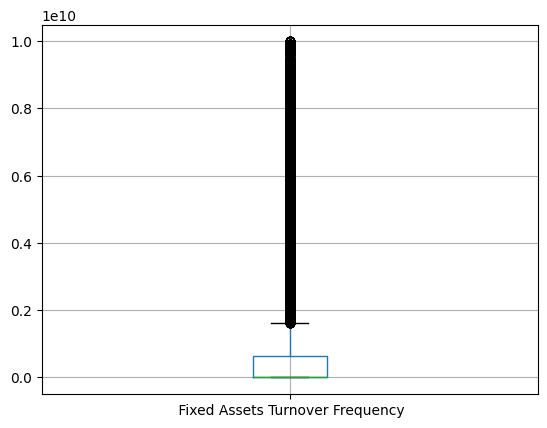

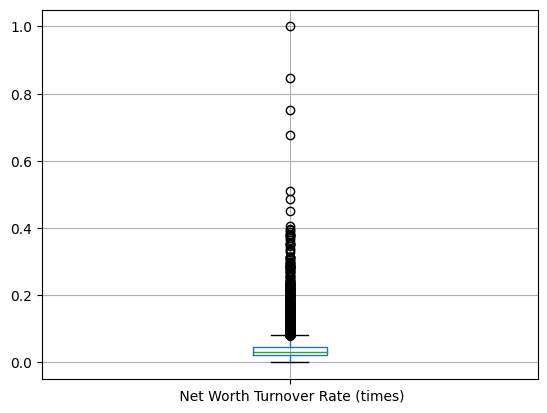

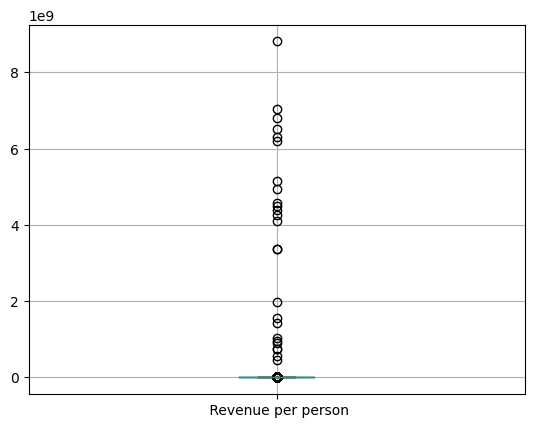

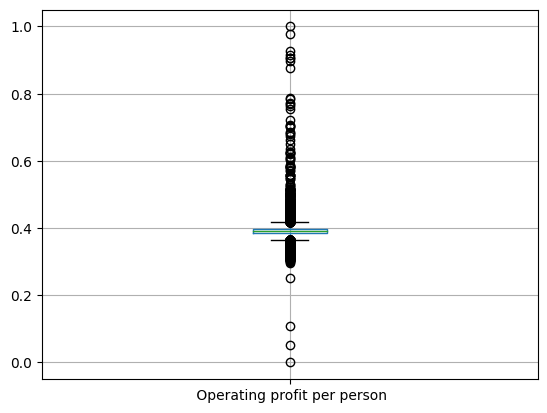

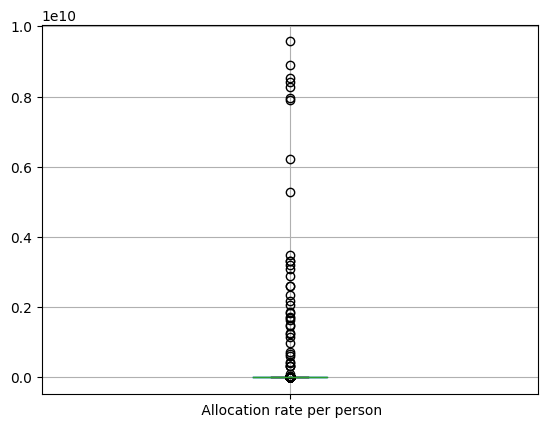

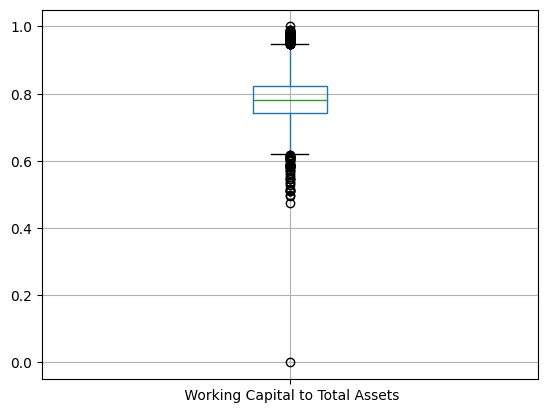

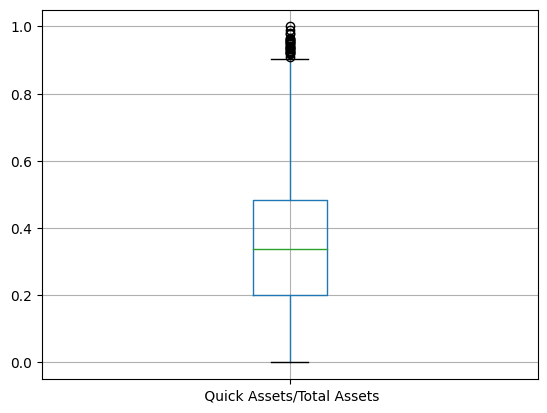

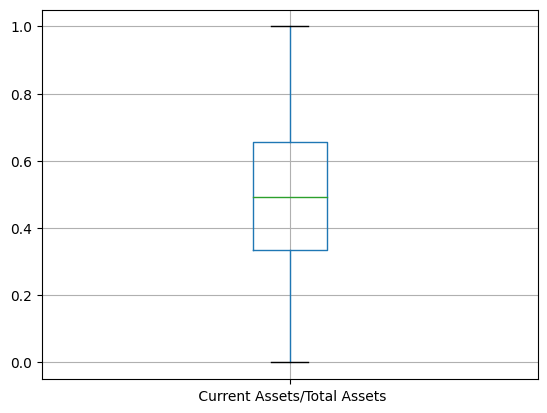

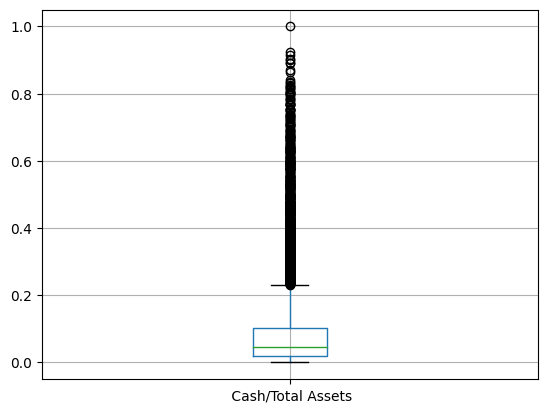

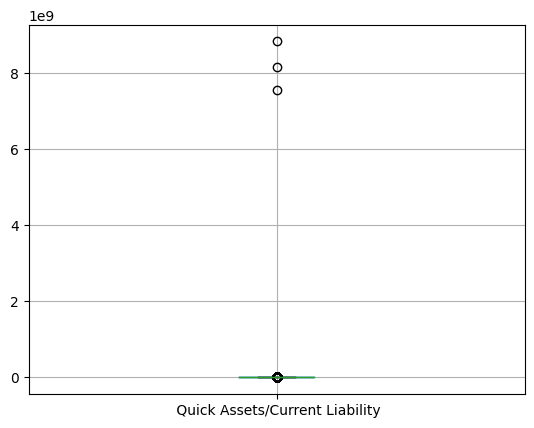

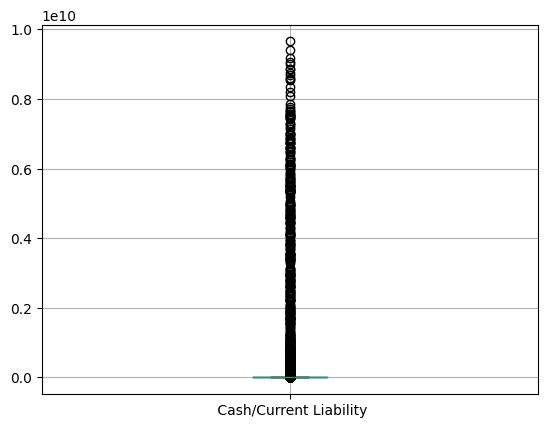

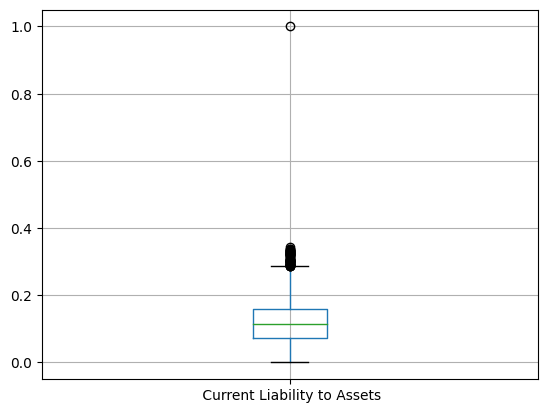

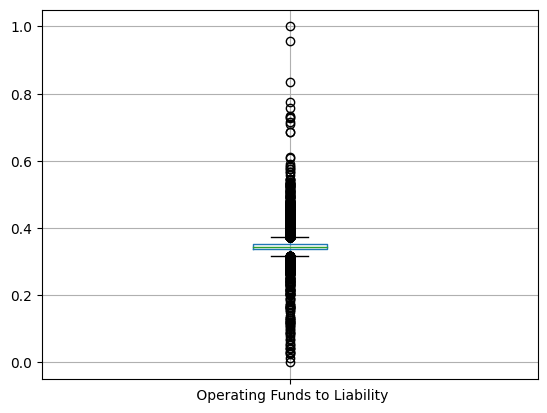

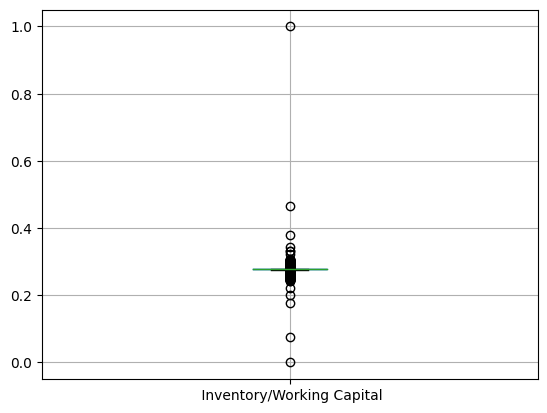

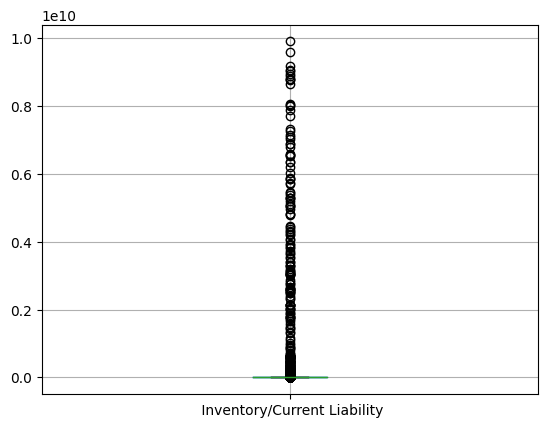

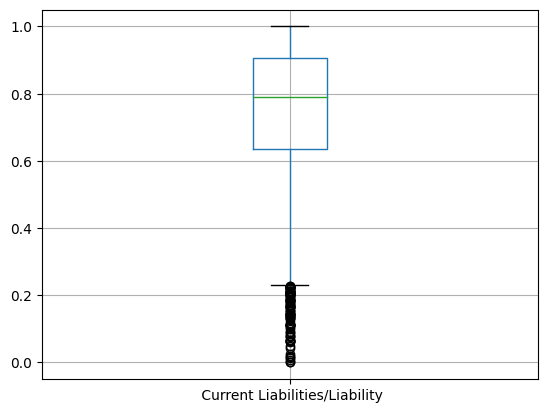

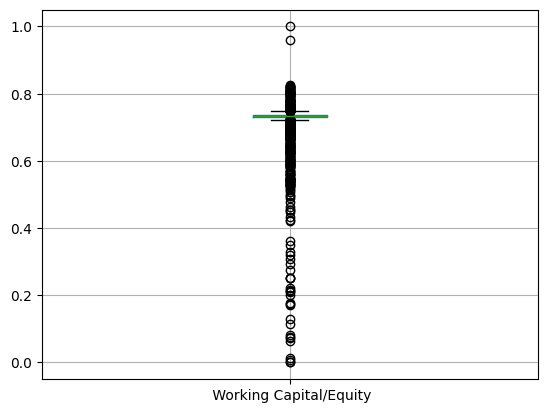

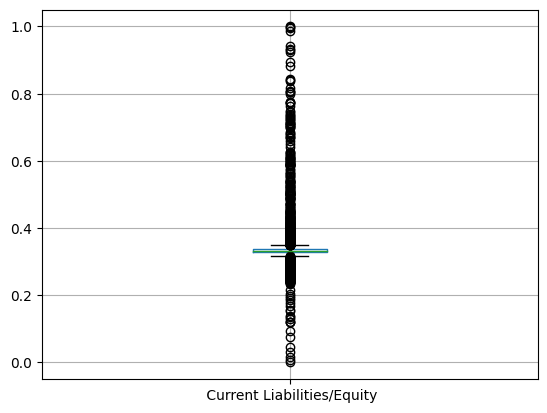

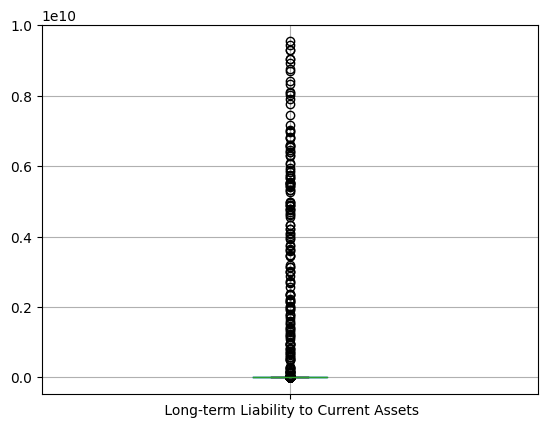

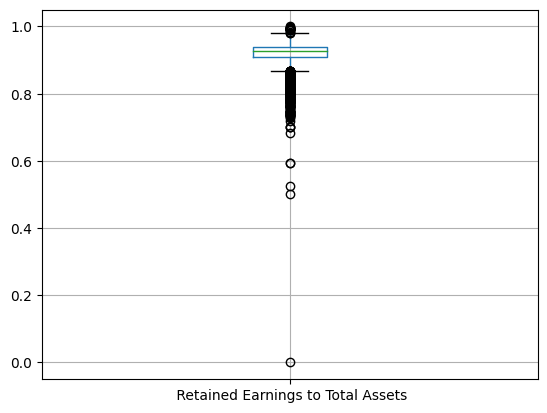

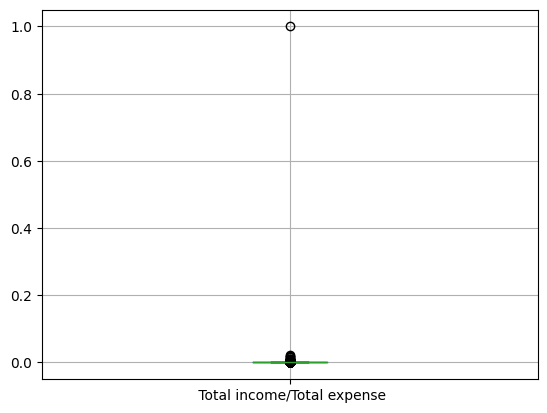

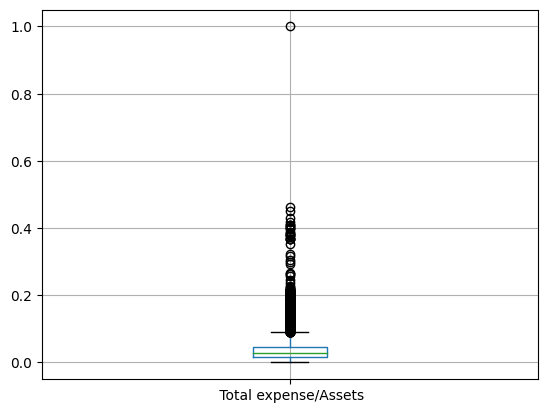

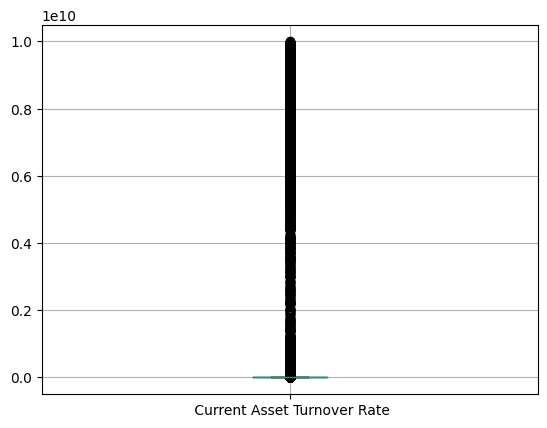

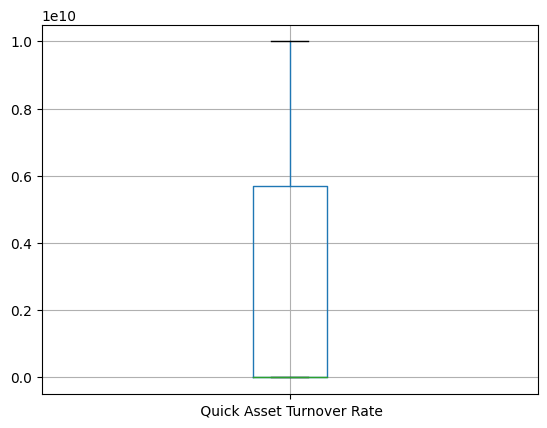

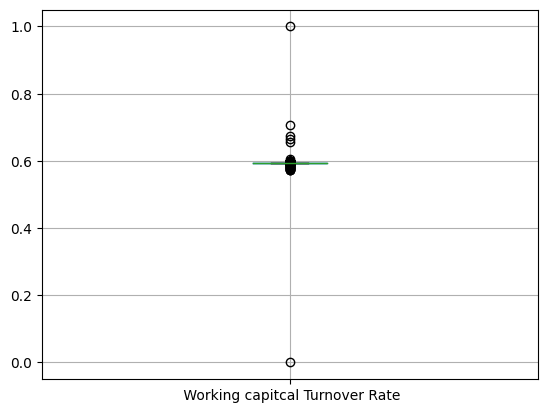

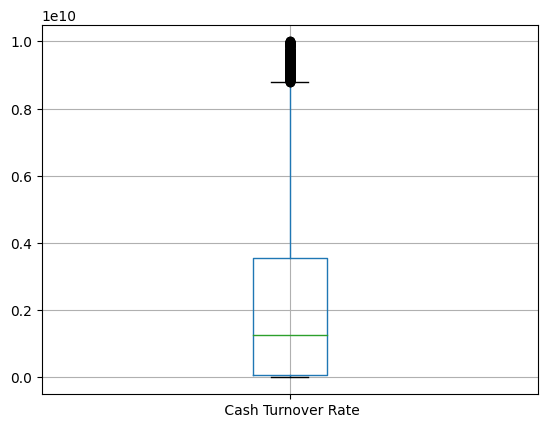

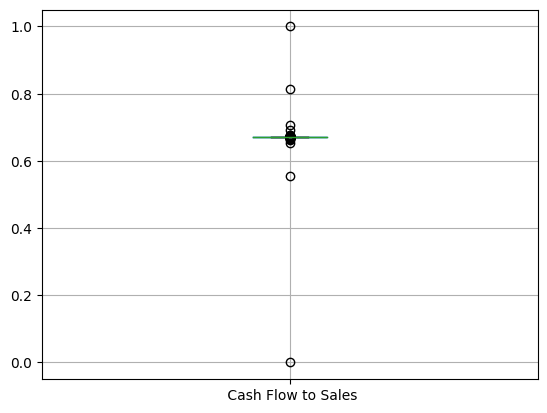

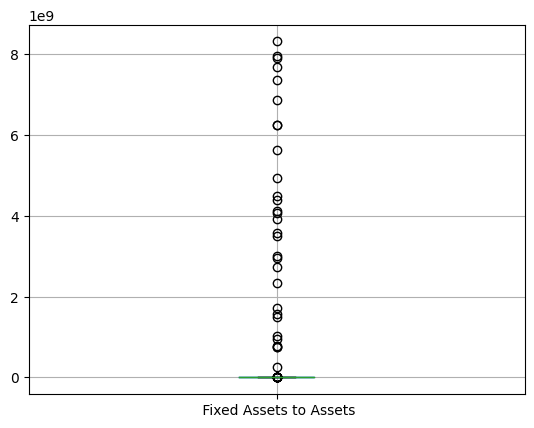

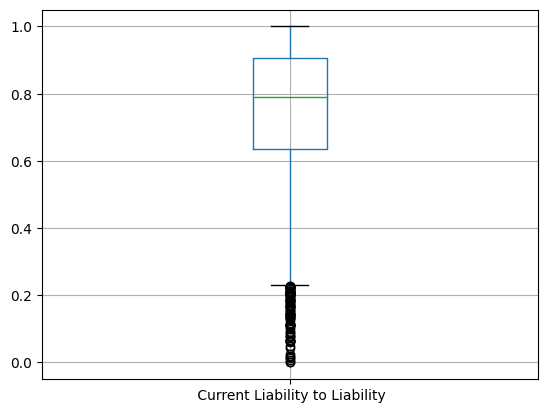

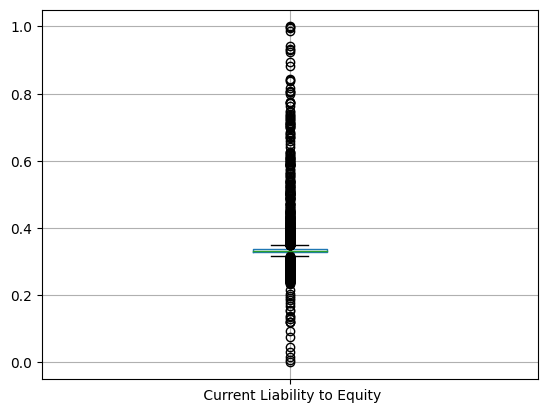

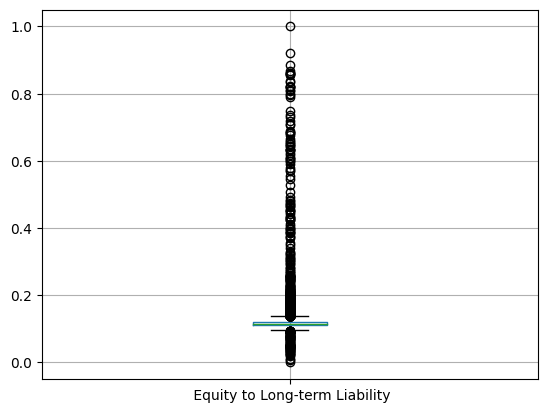

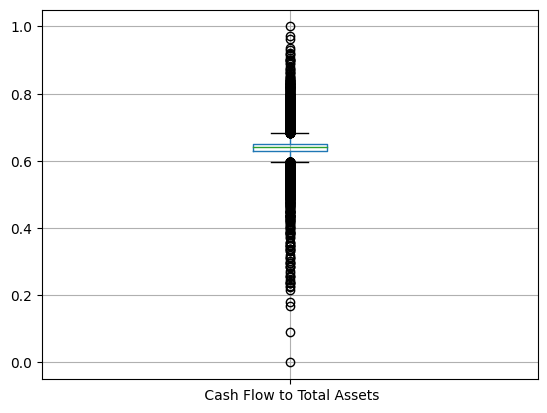

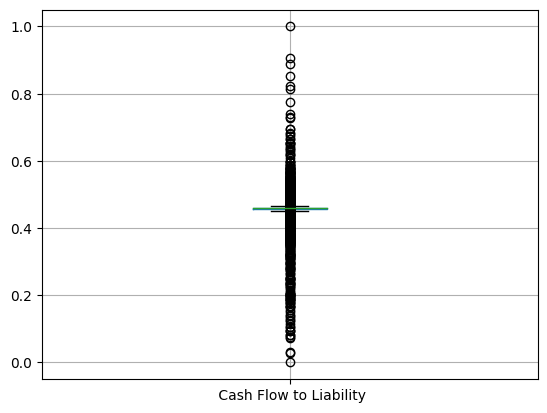

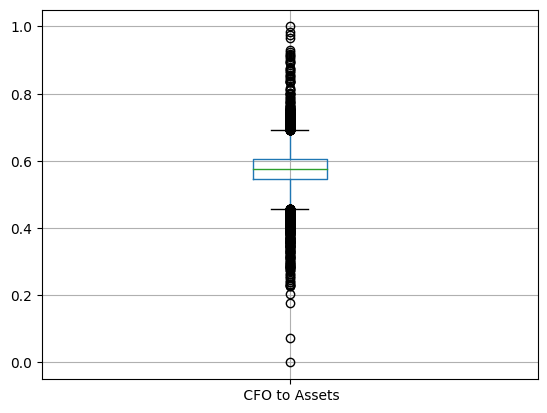

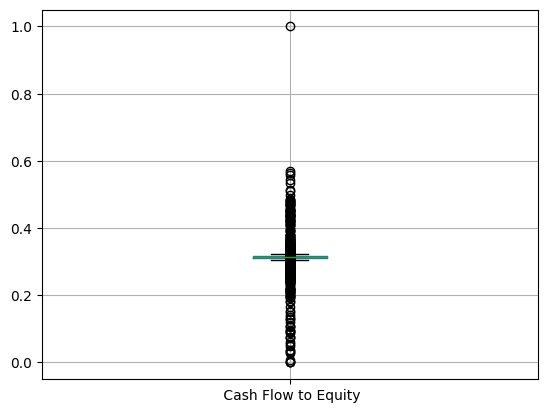

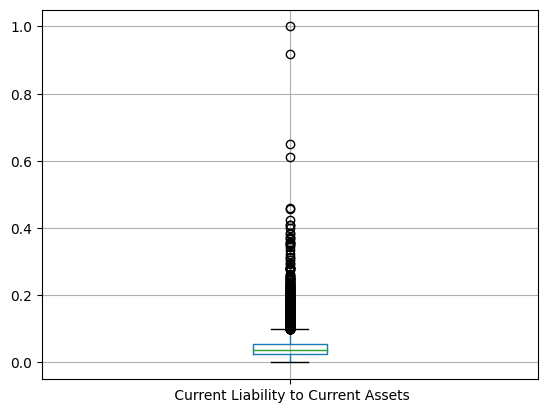

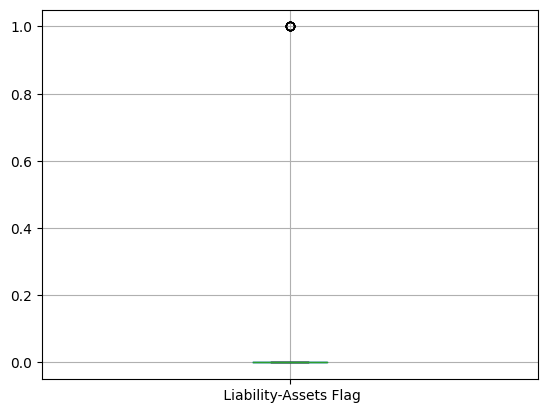

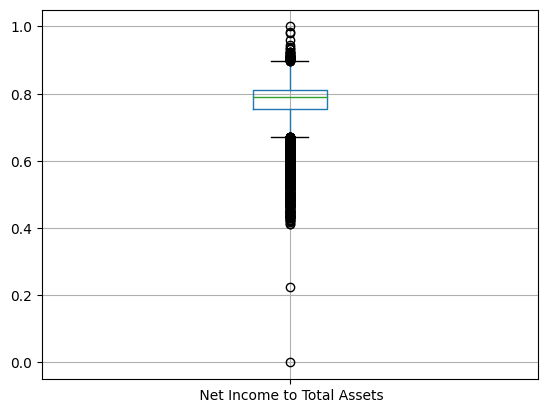

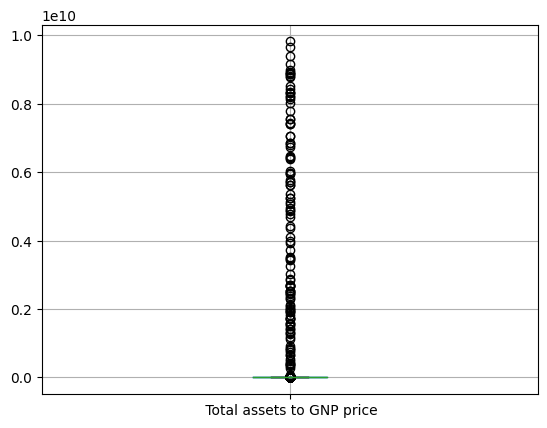

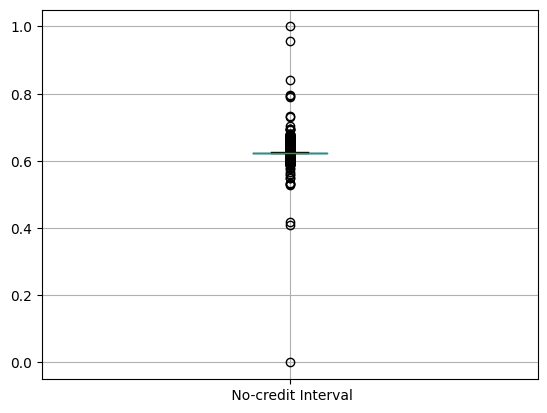

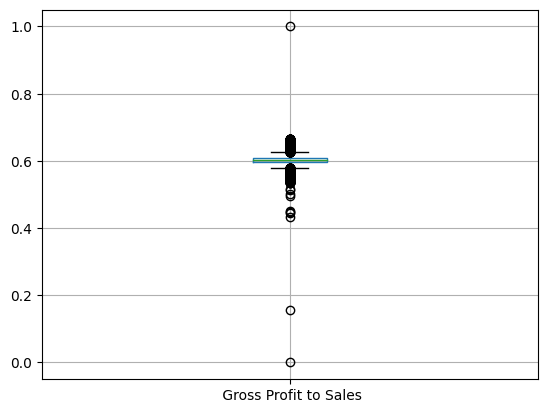

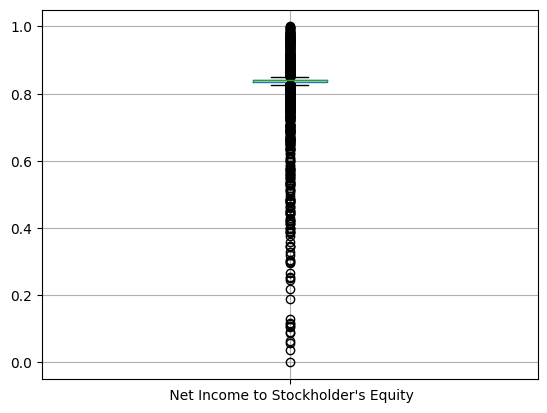

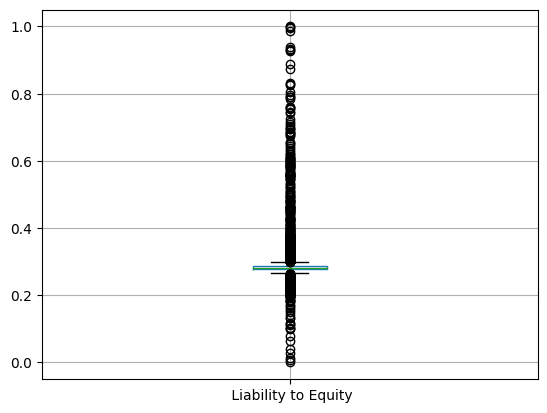

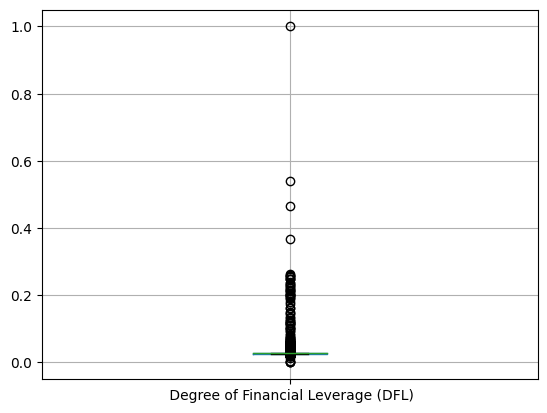

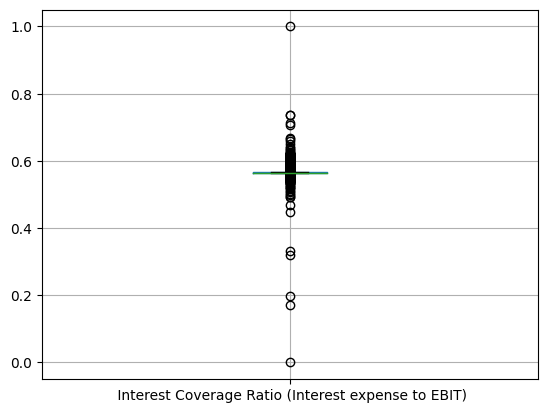

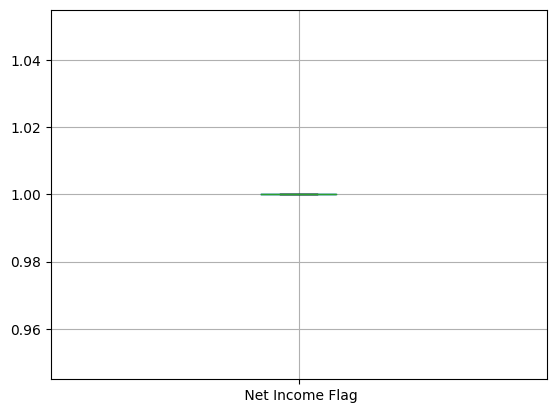

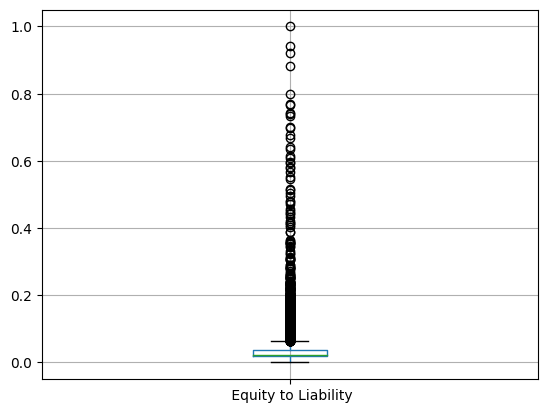

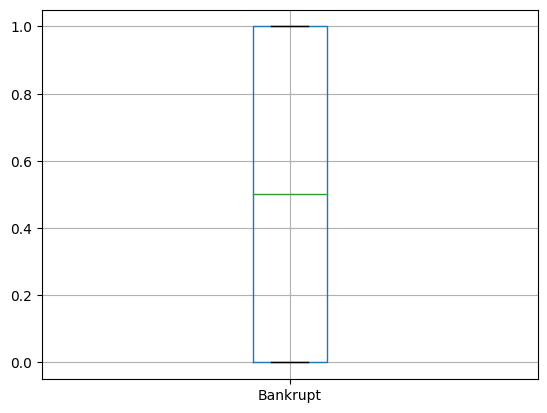

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i] = np.where(df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df[i])
    df[i] = np.where(df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df[i])

<ipython-input-14-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


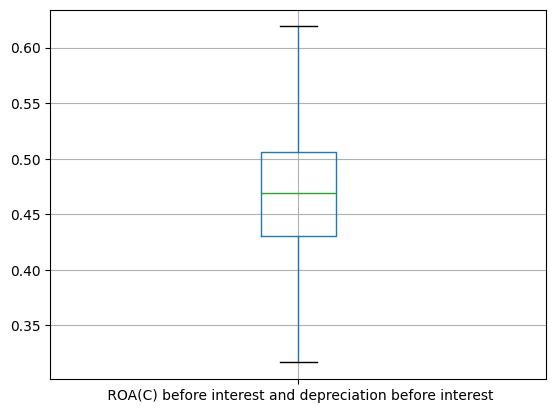

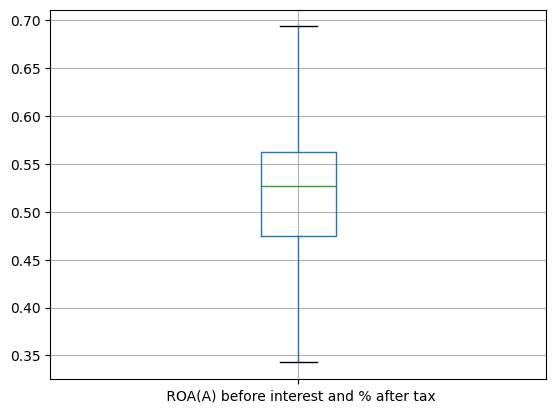

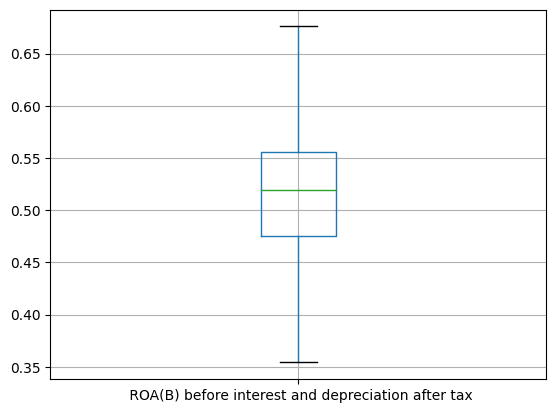

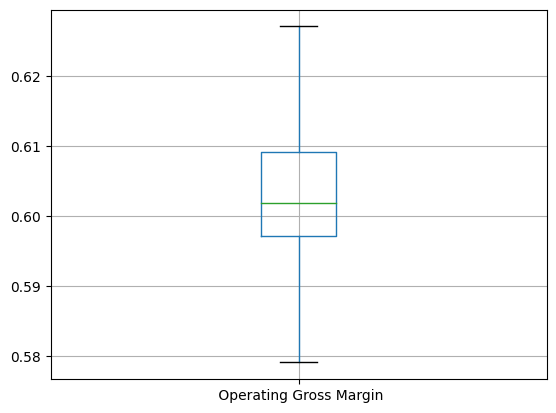

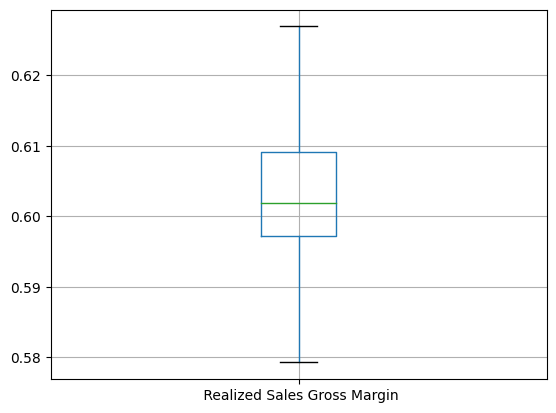

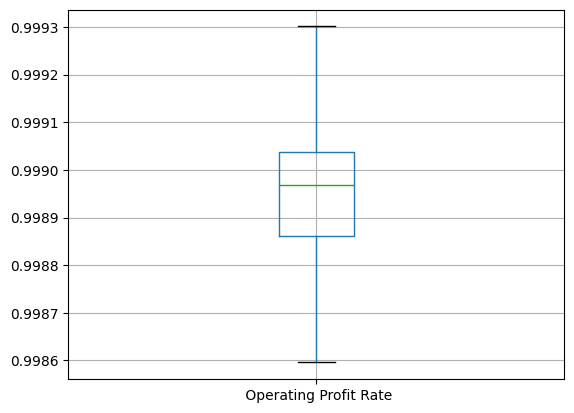

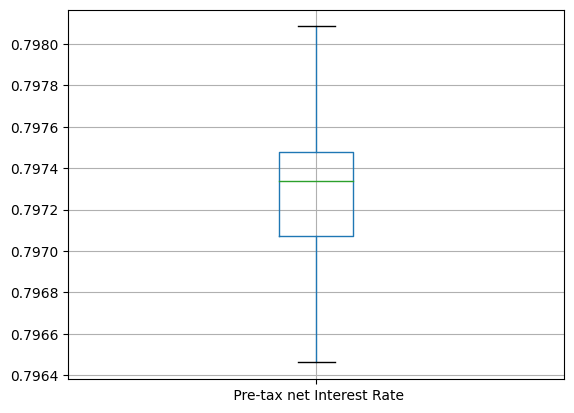

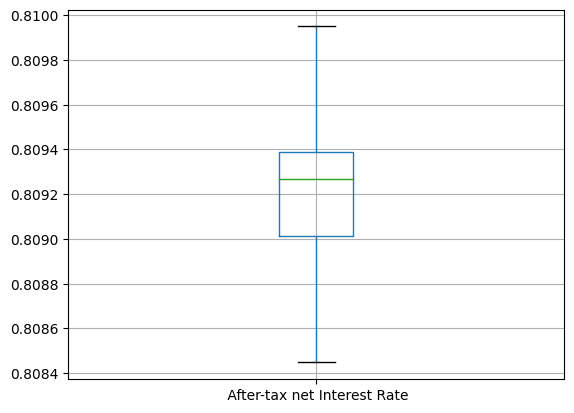

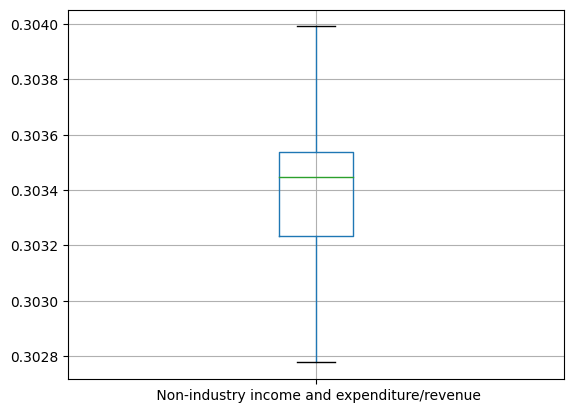

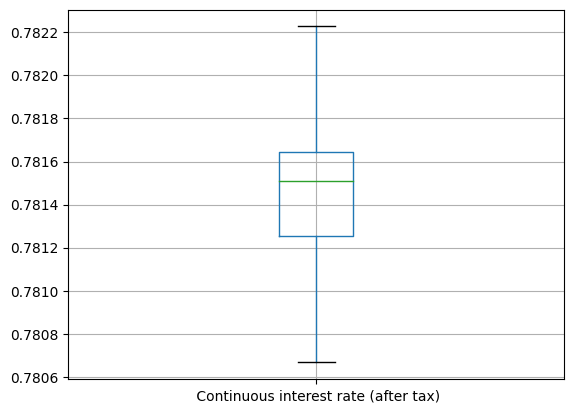

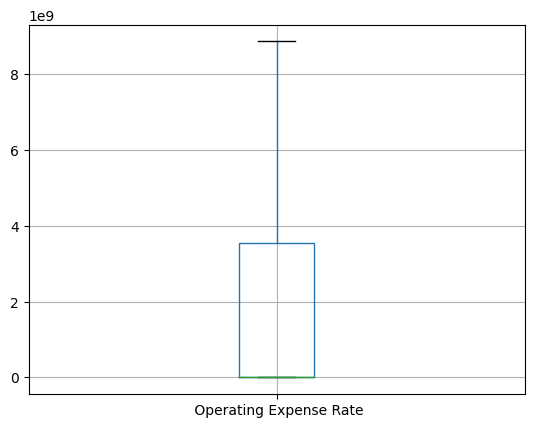

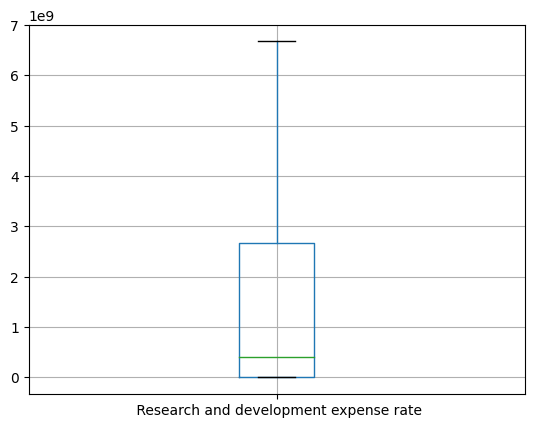

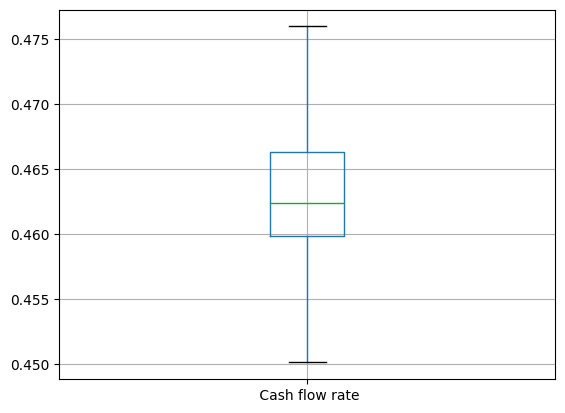

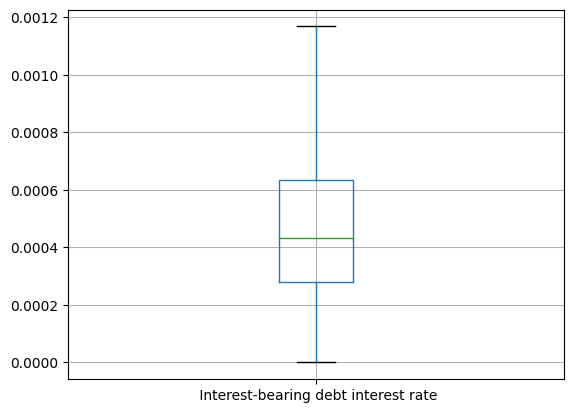

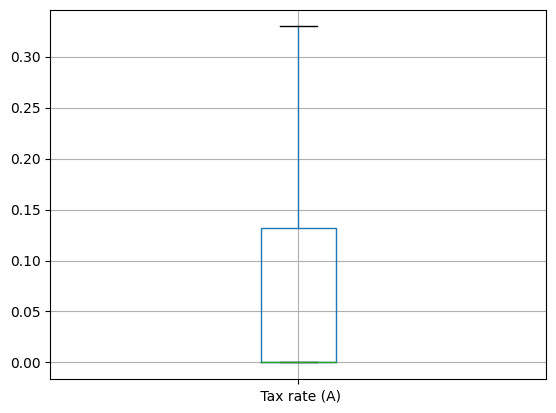

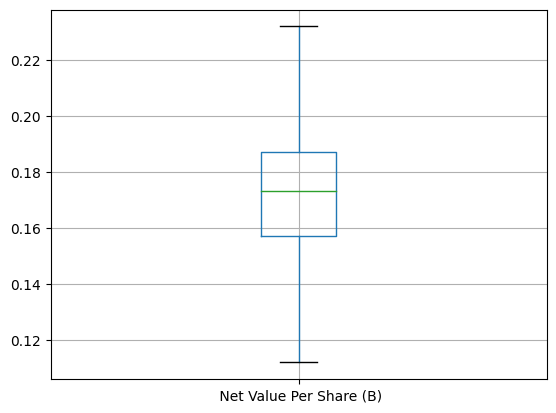

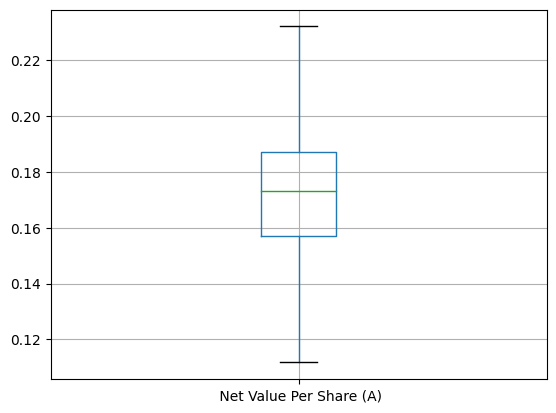

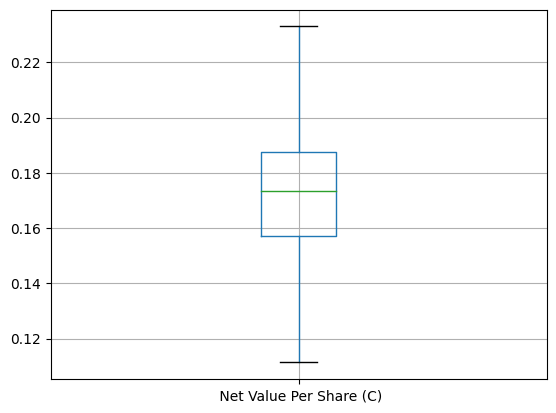

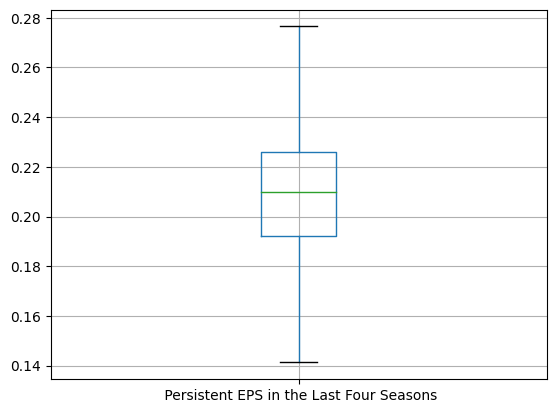

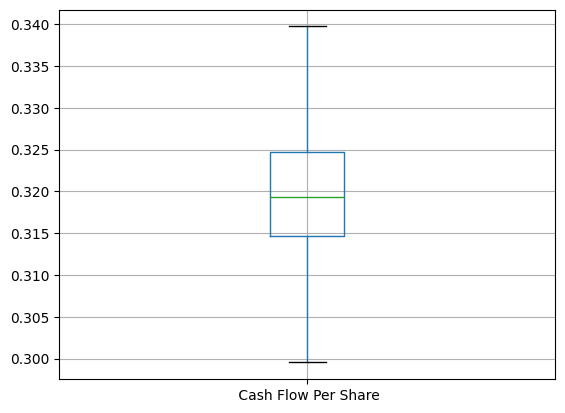

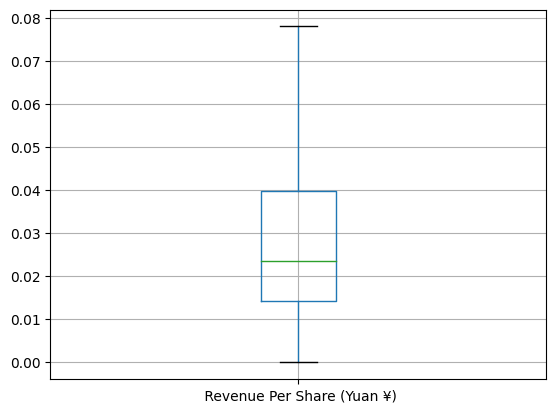

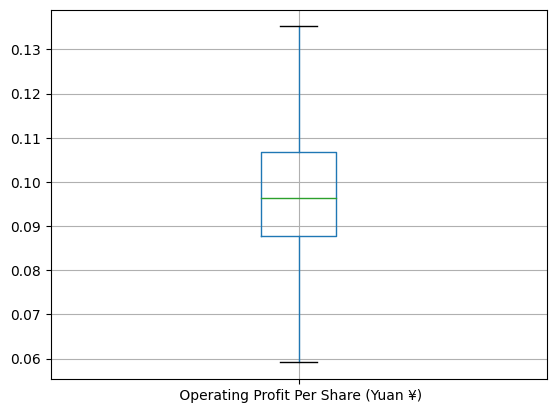

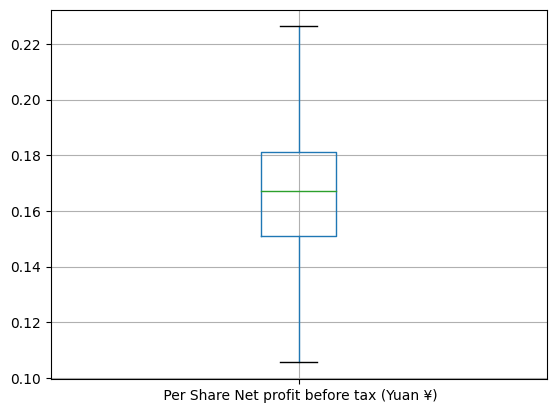

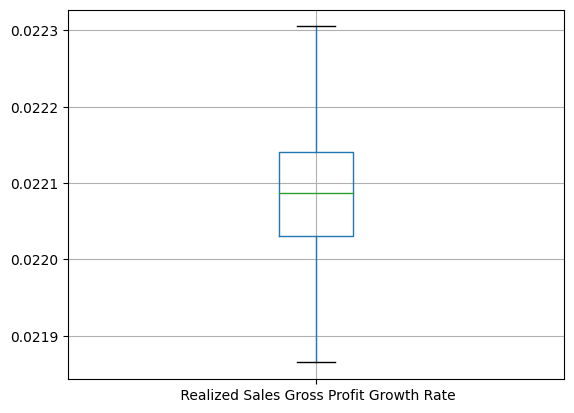

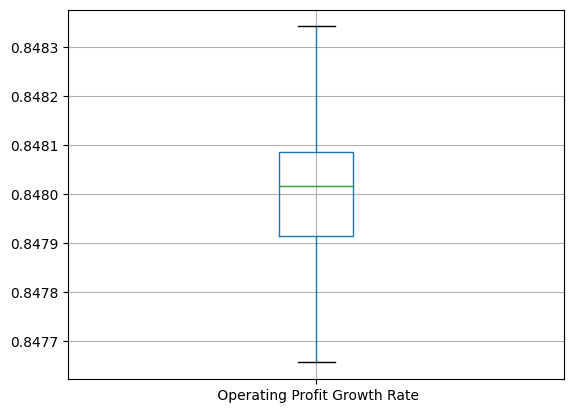

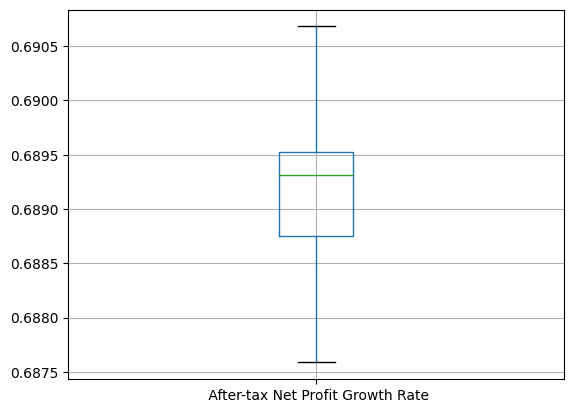

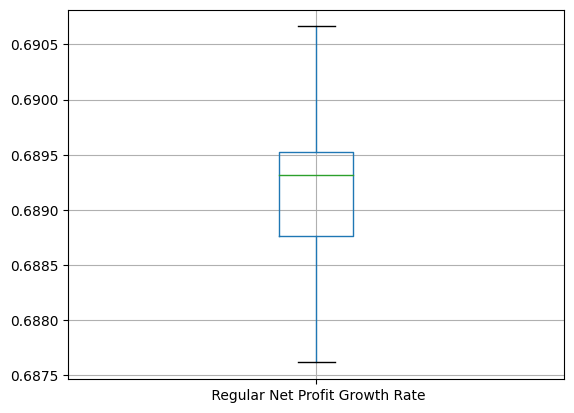

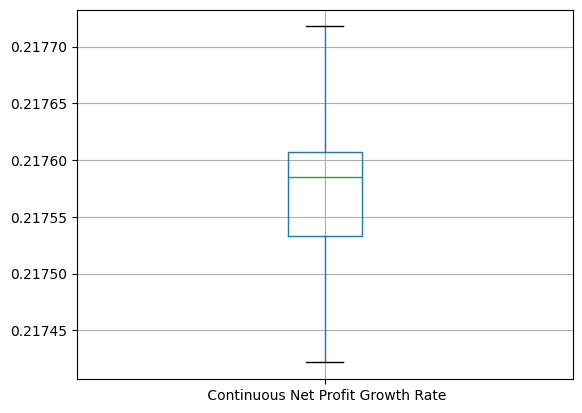

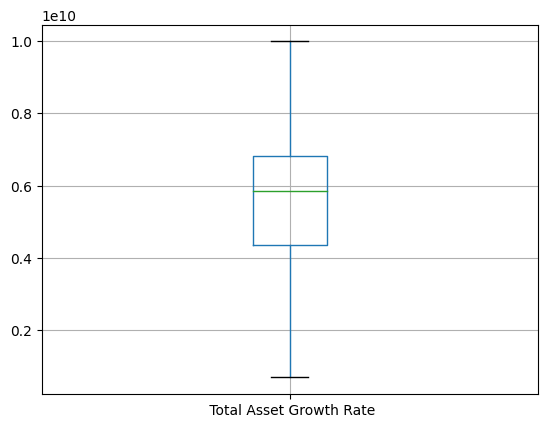

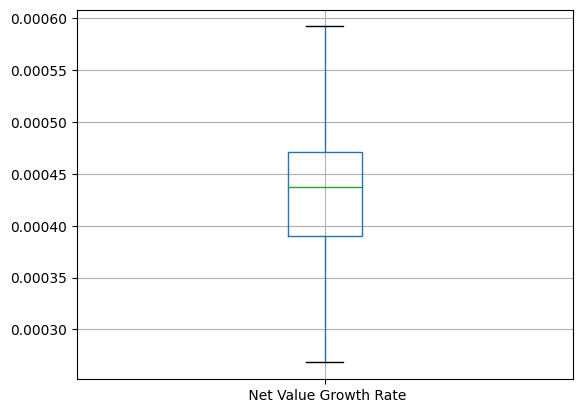

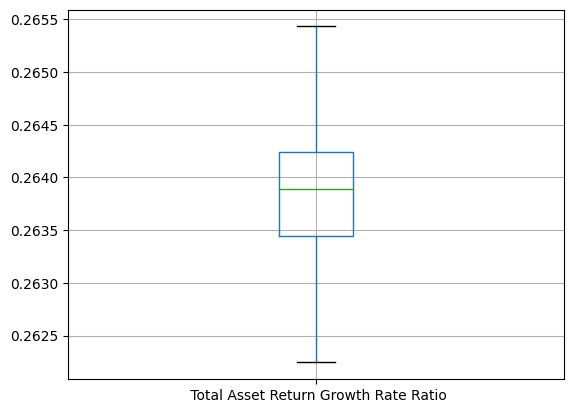

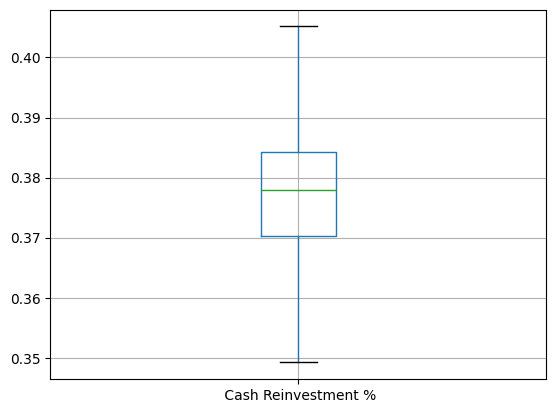

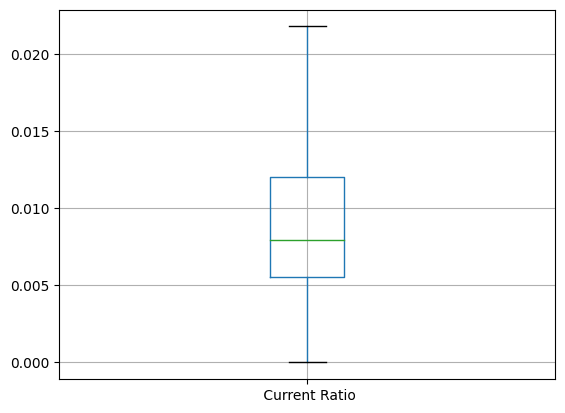

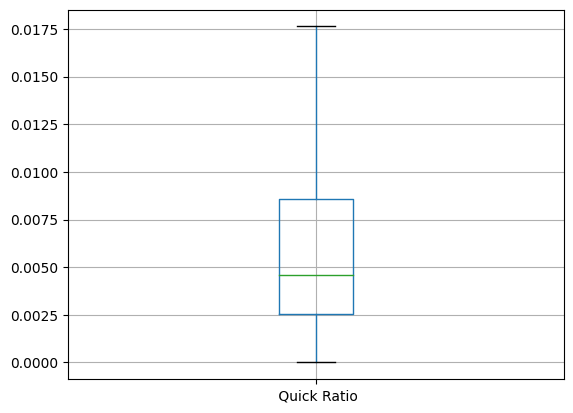

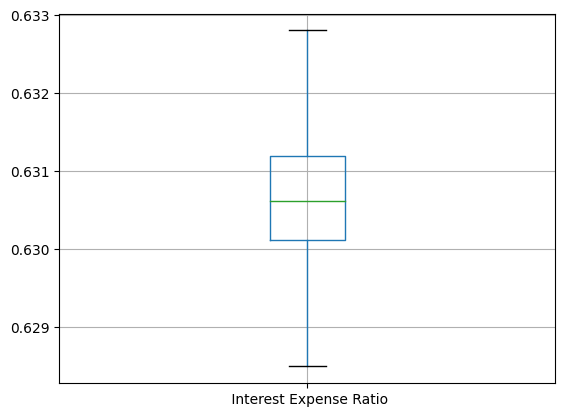

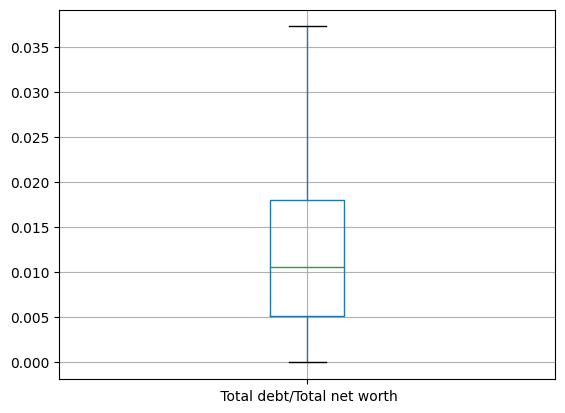

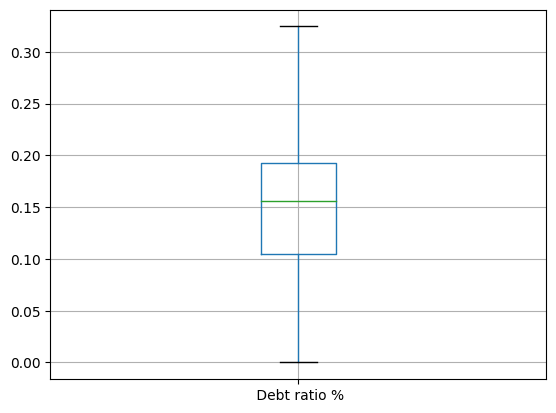

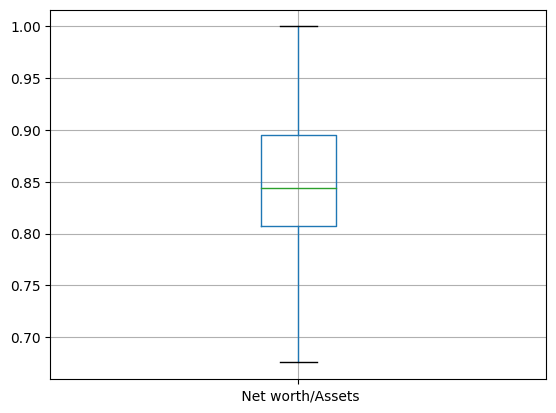

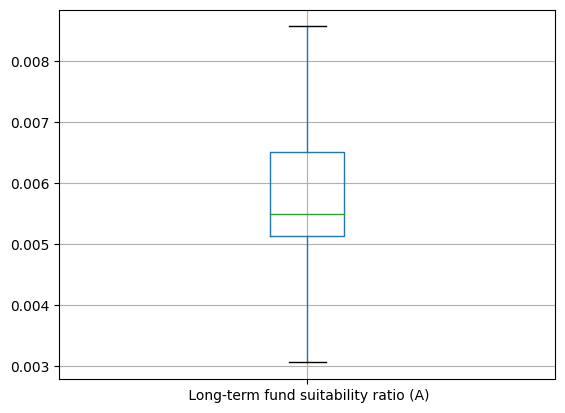

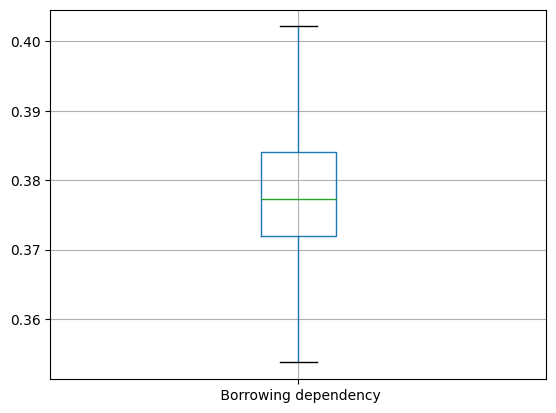

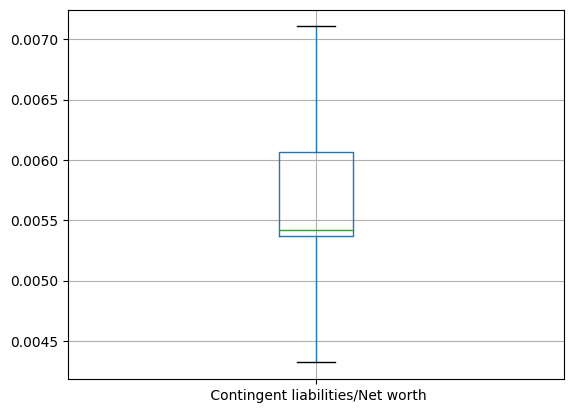

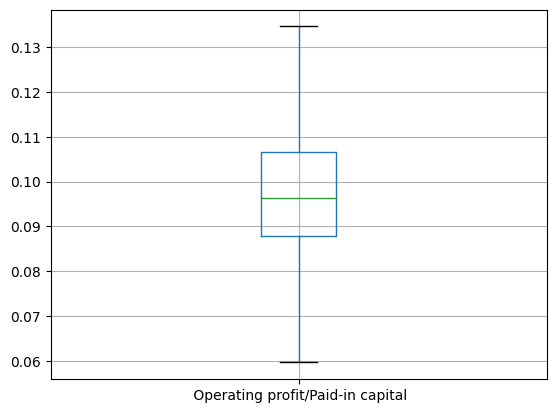

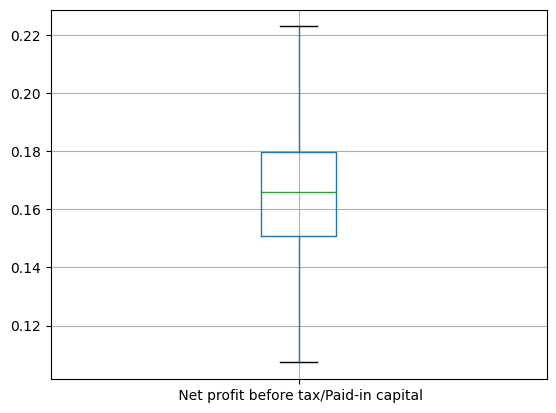

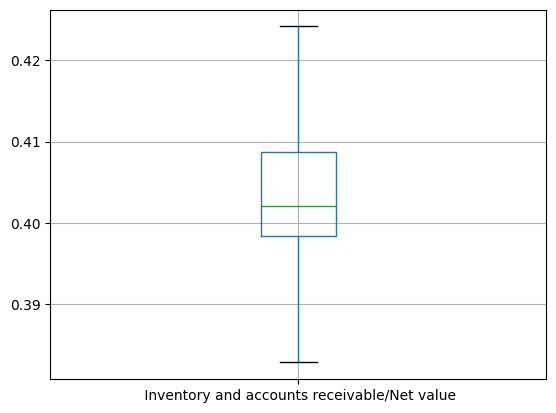

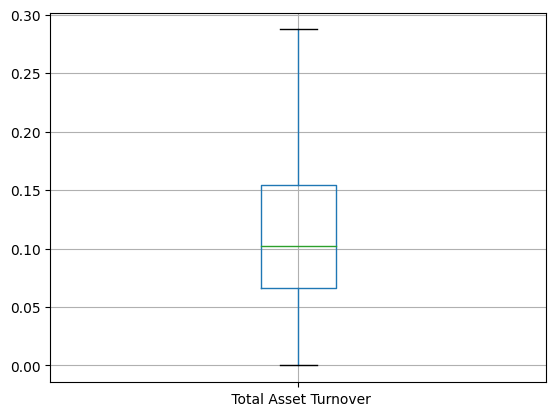

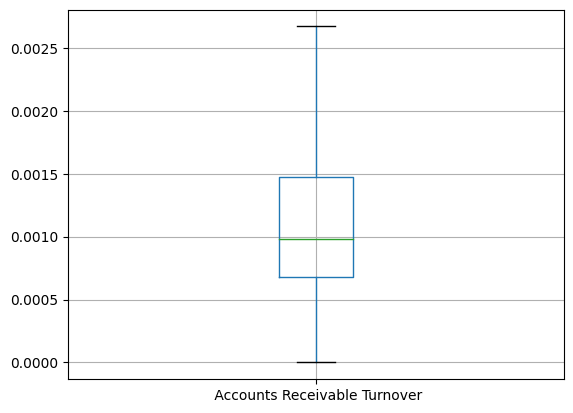

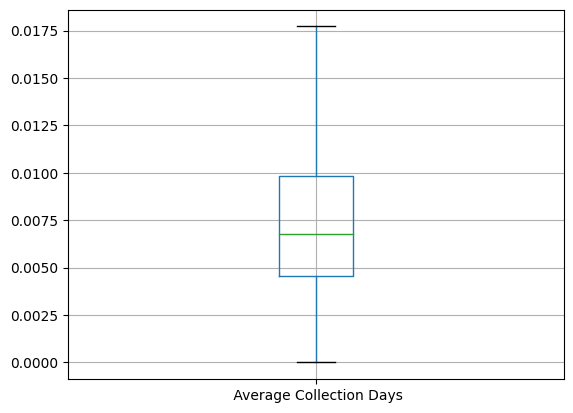

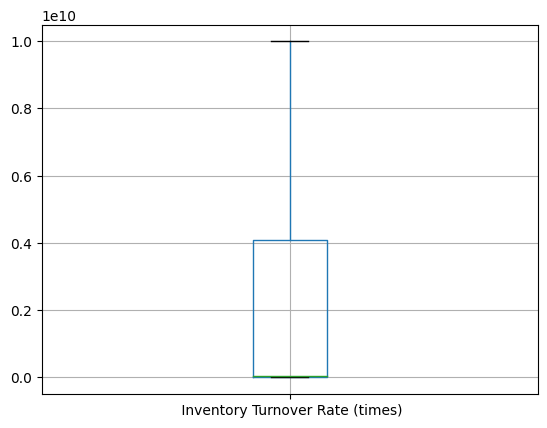

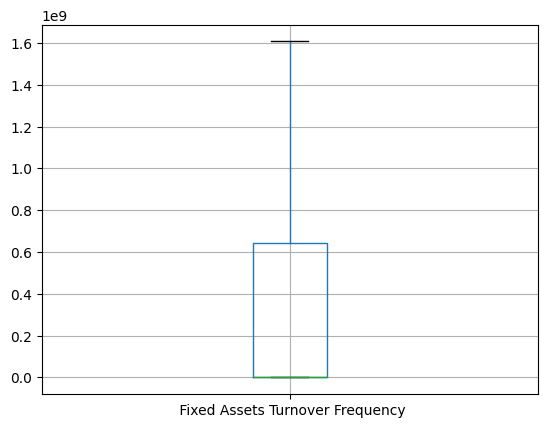

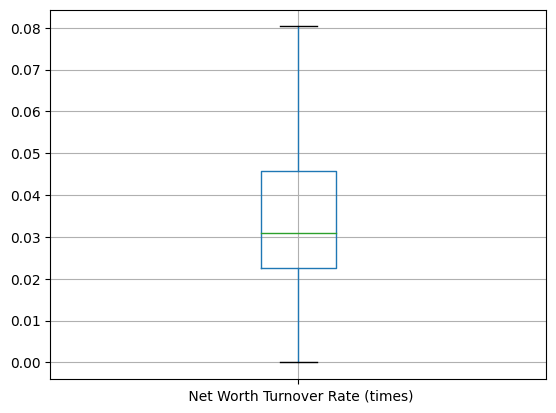

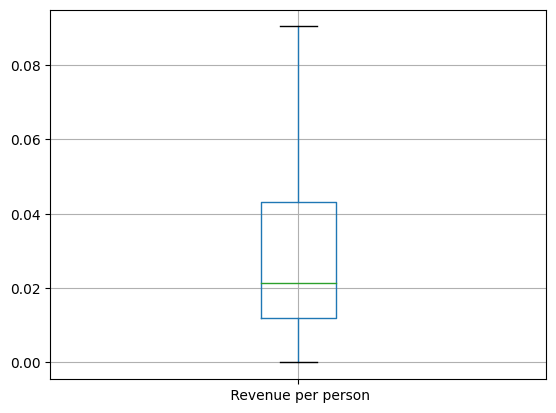

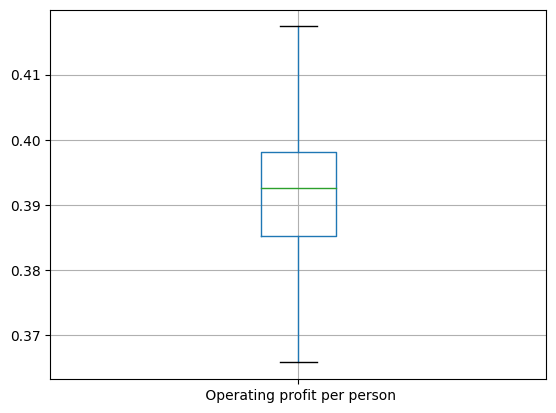

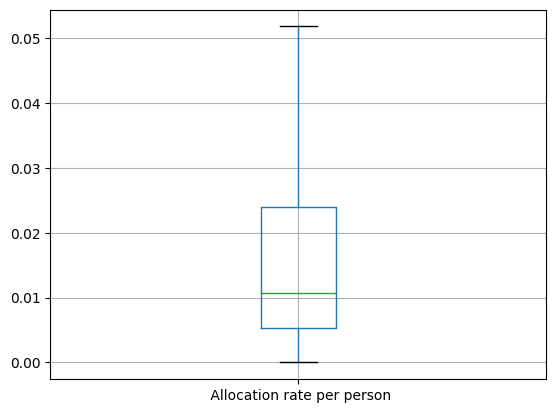

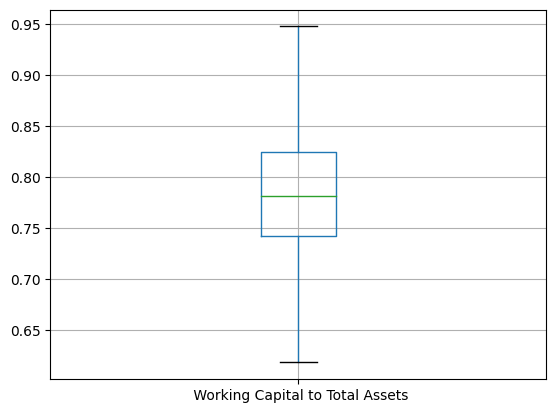

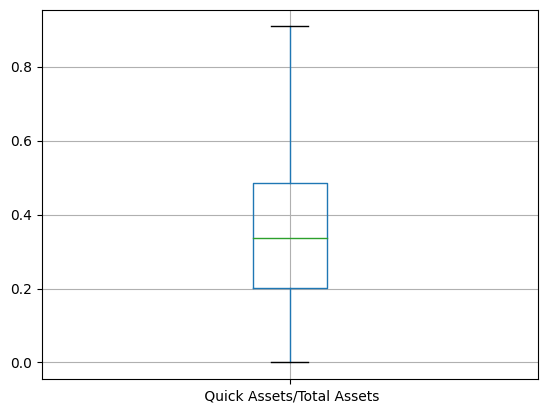

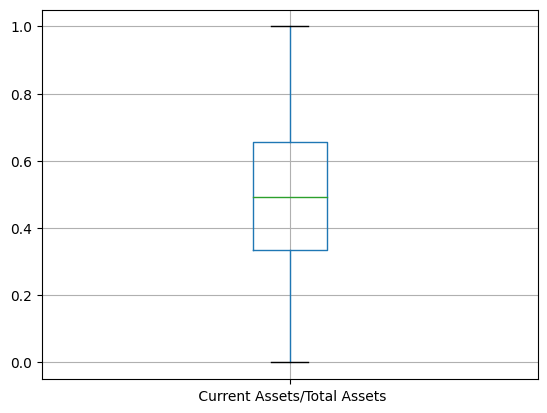

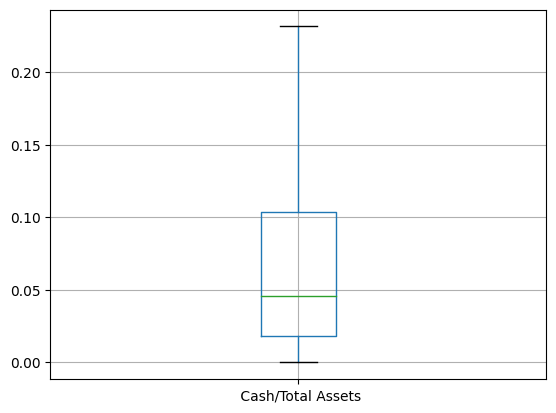

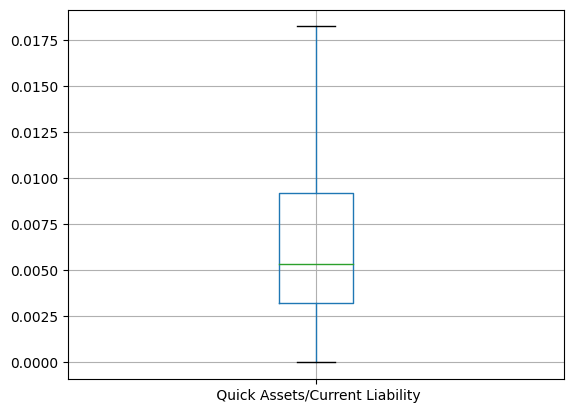

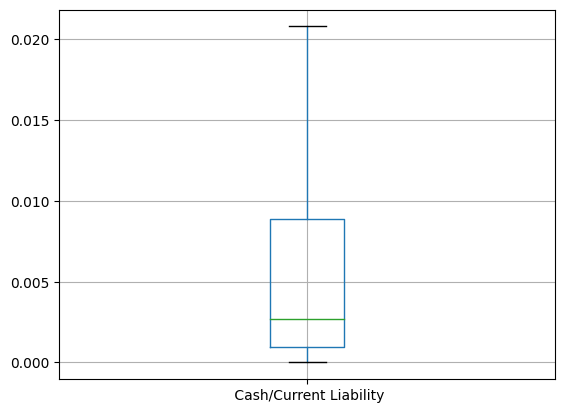

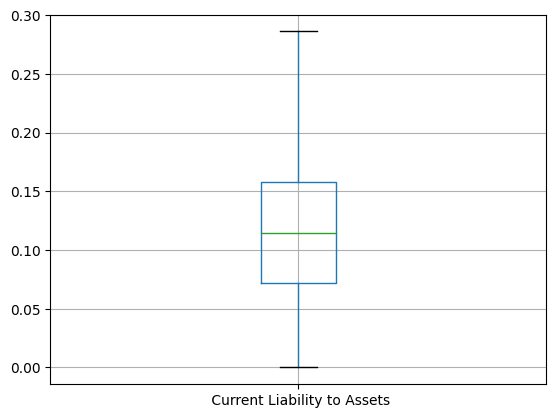

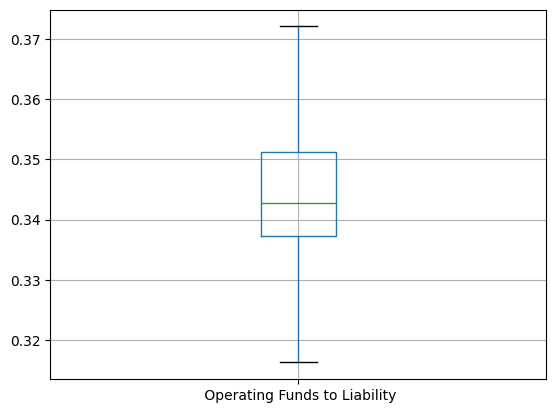

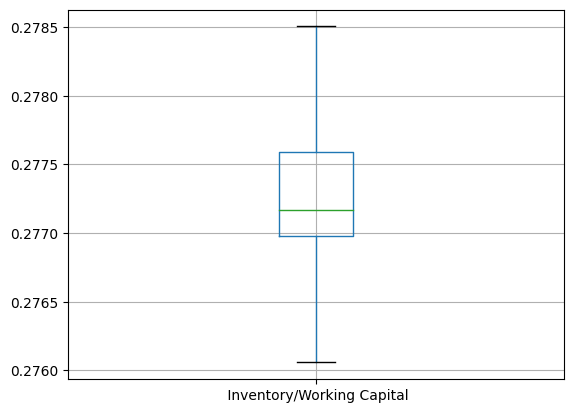

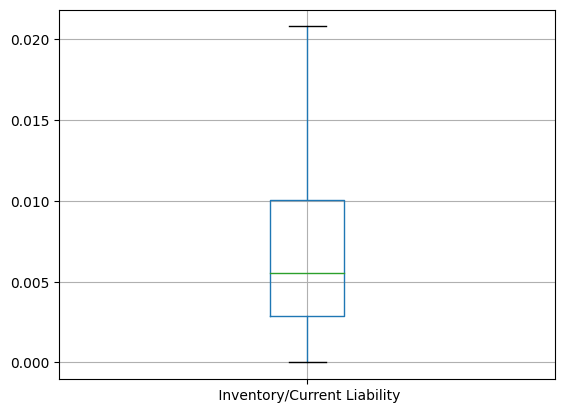

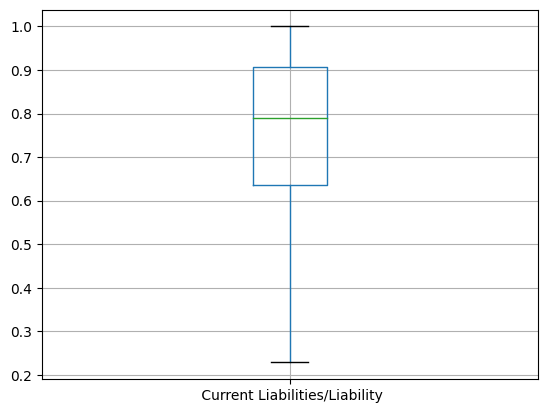

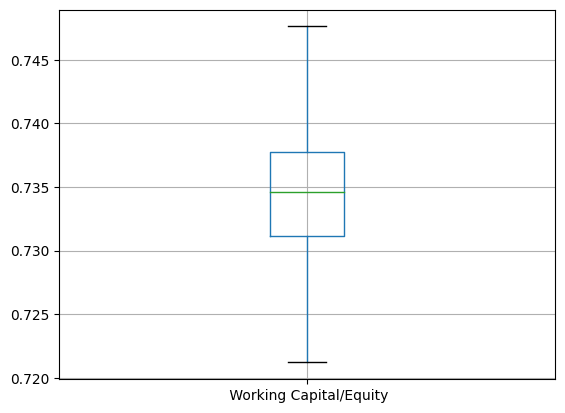

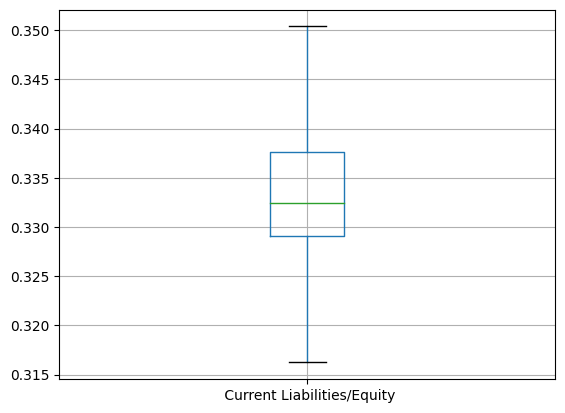

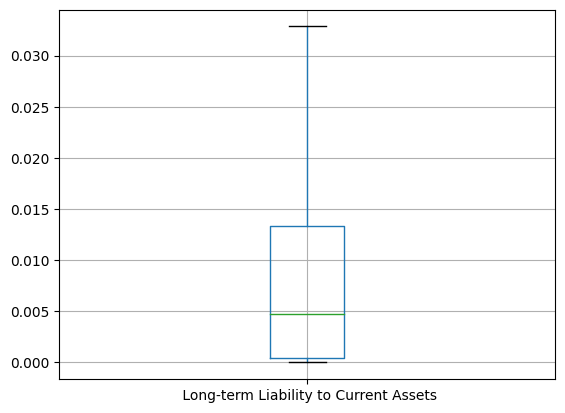

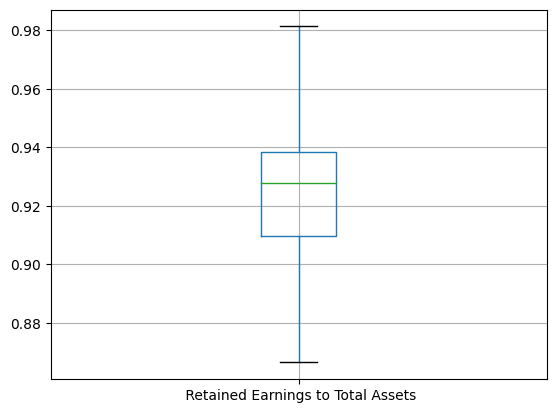

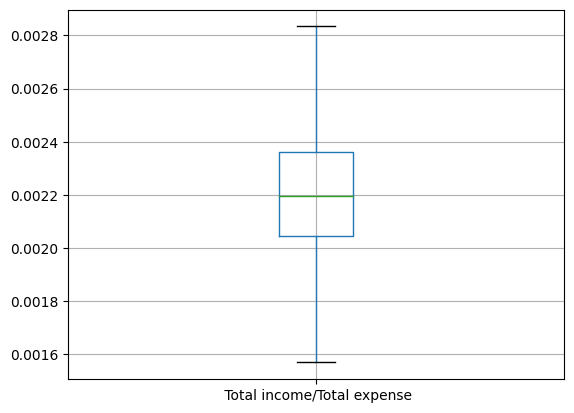

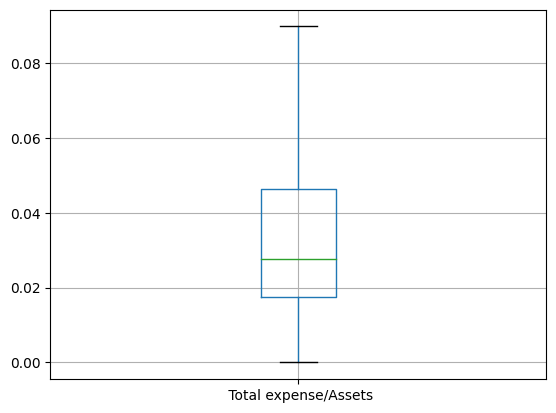

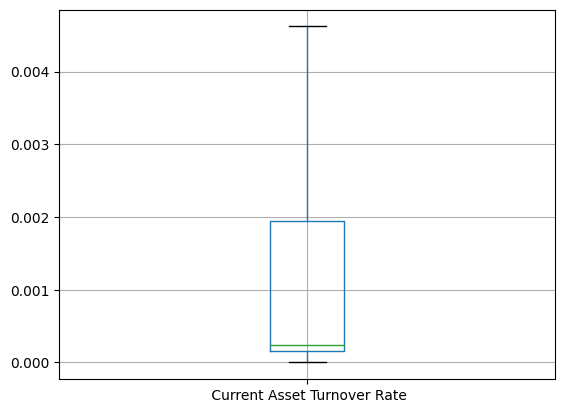

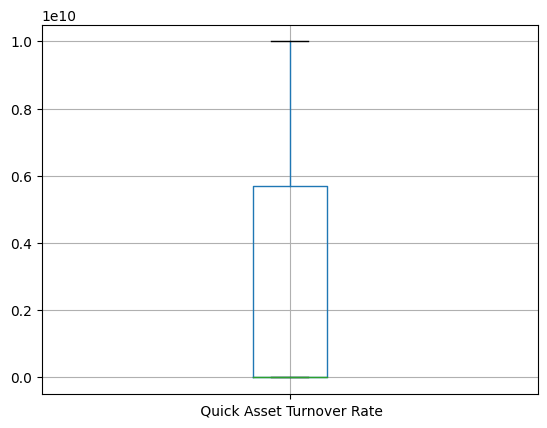

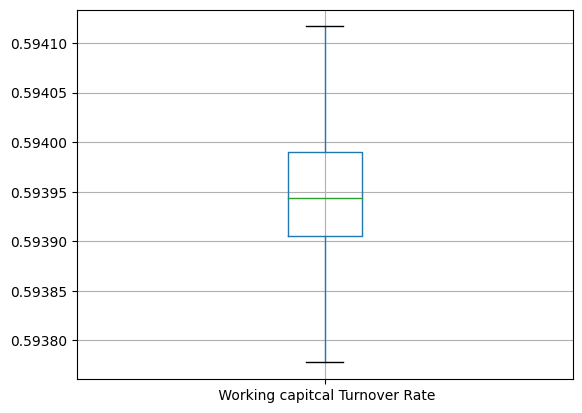

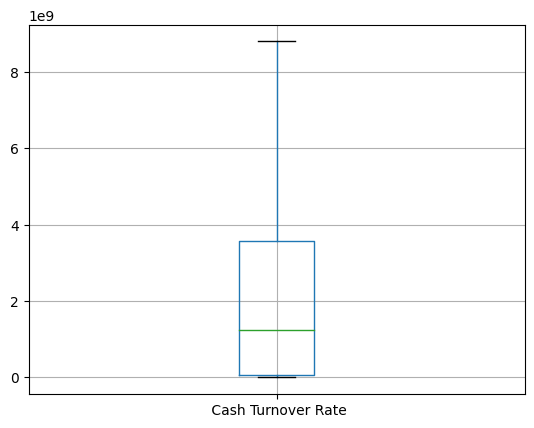

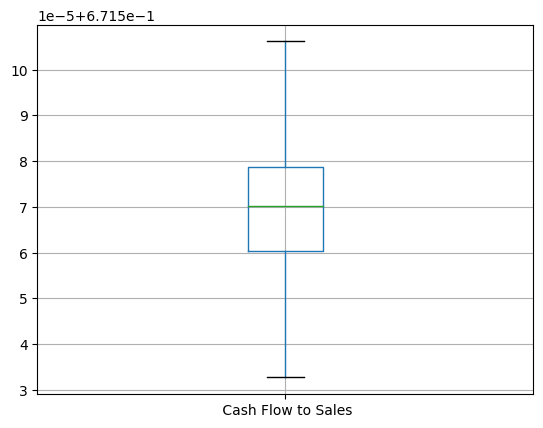

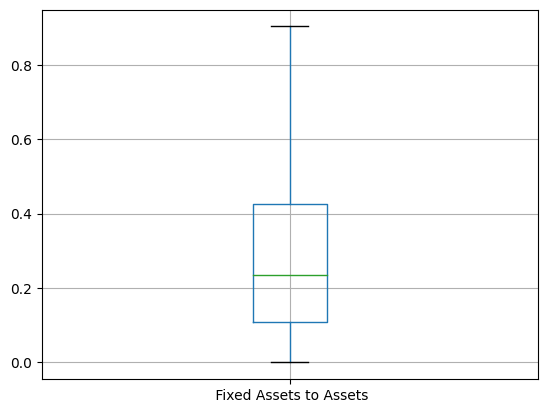

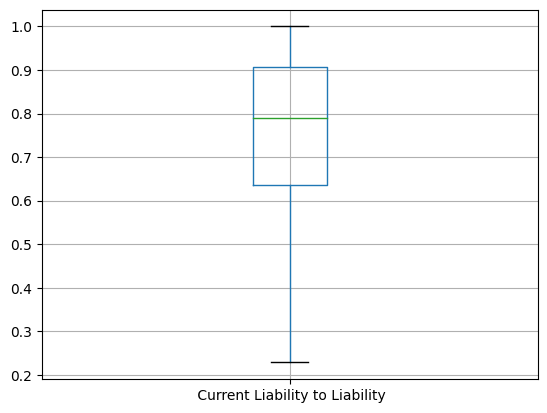

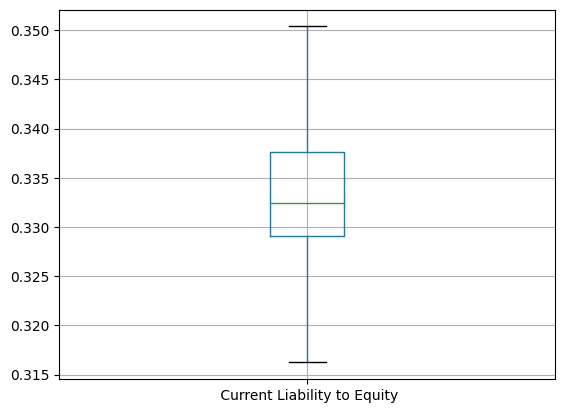

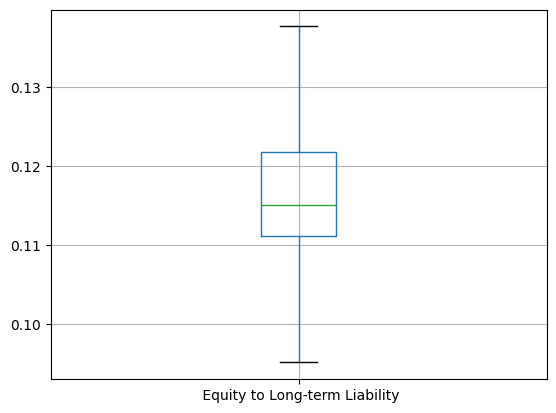

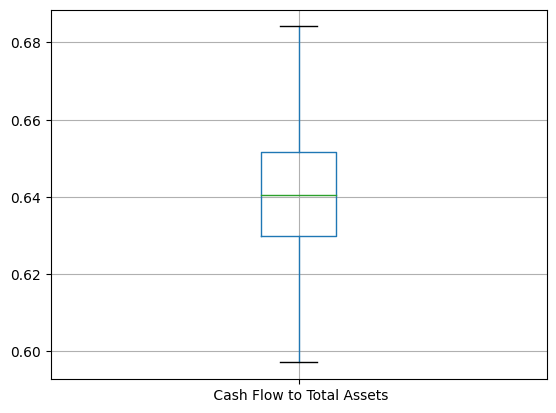

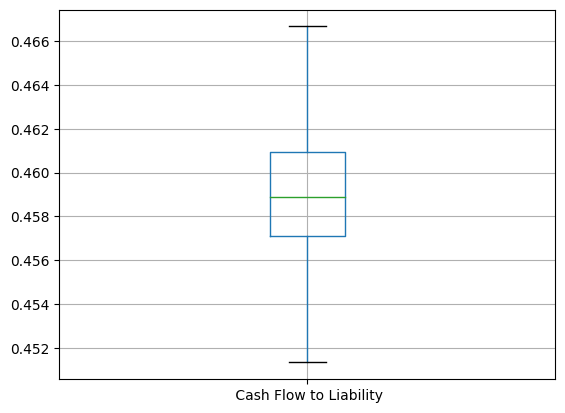

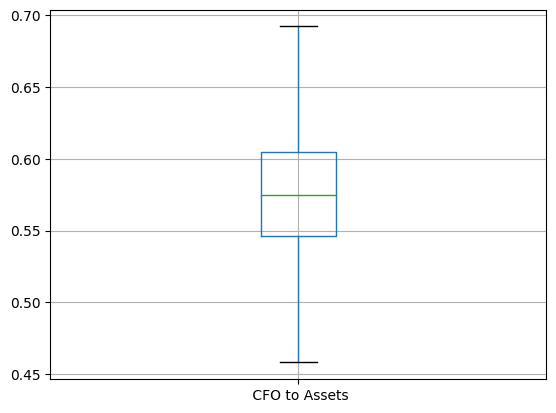

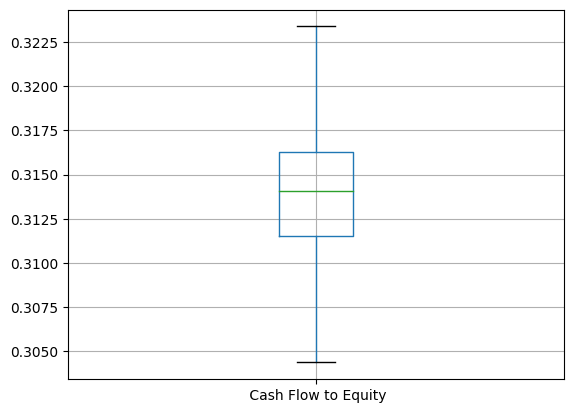

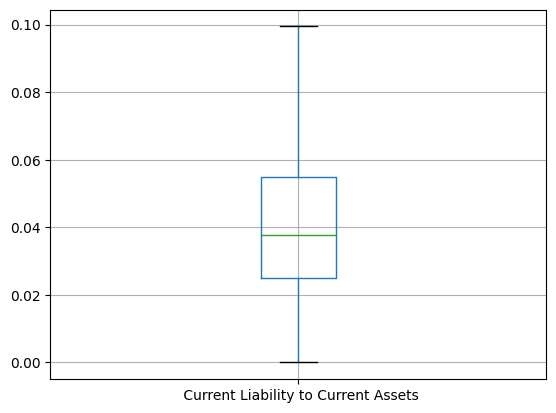

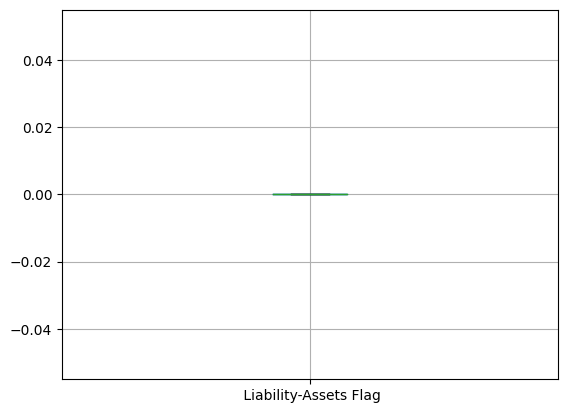

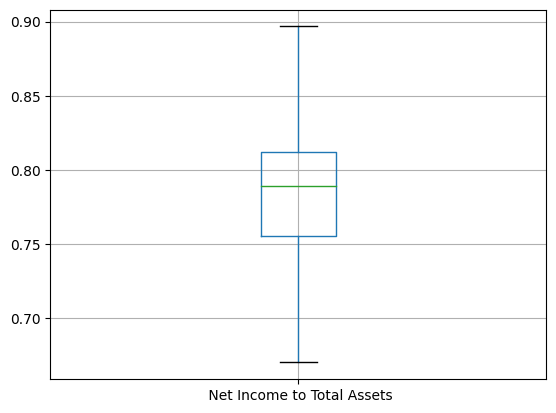

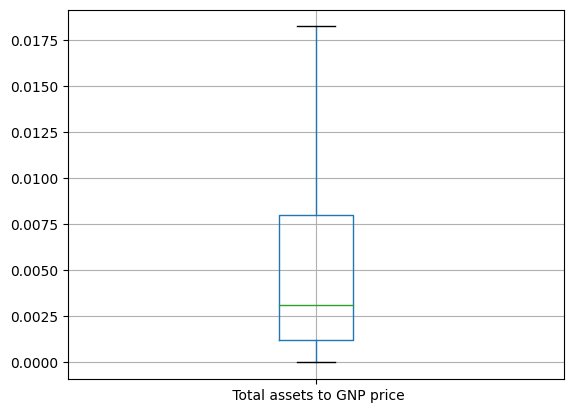

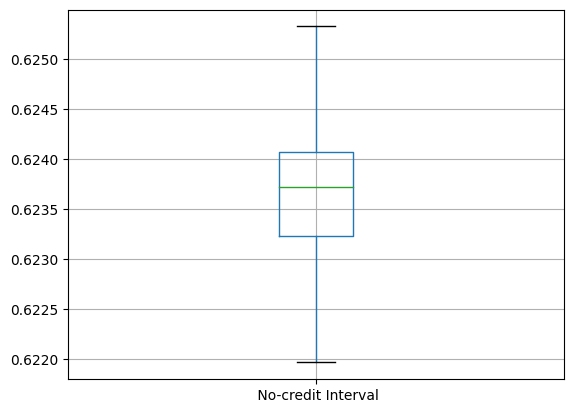

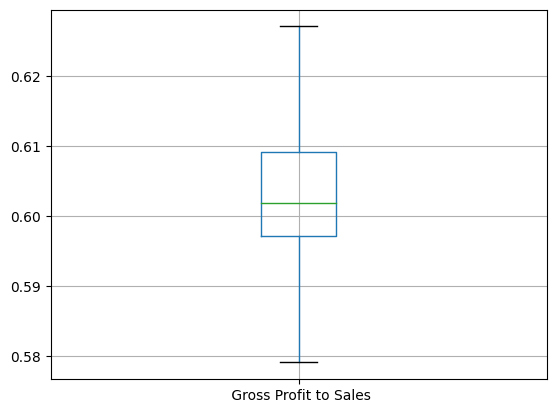

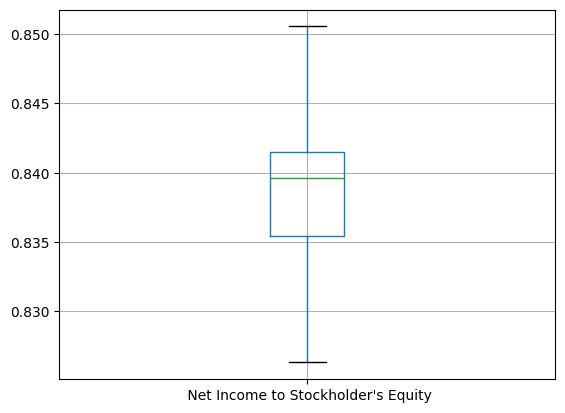

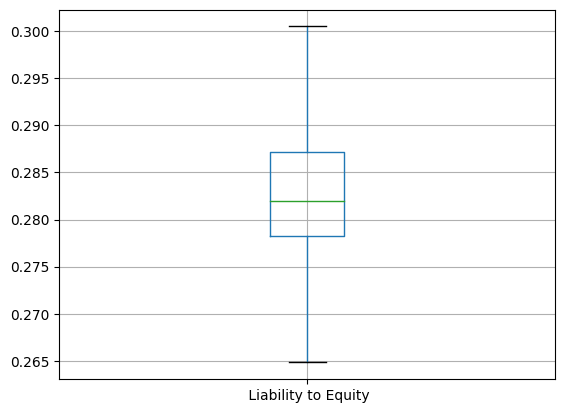

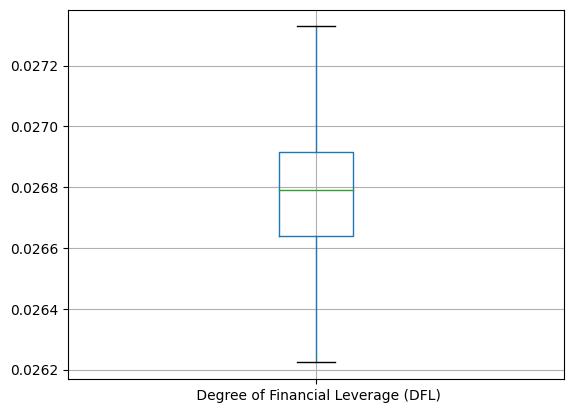

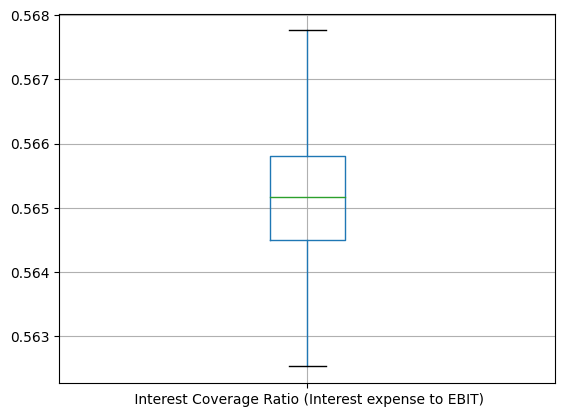

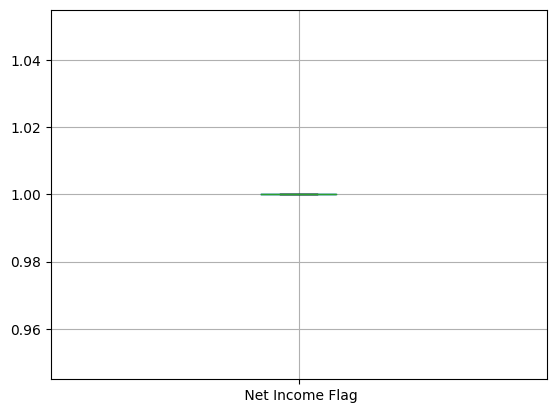

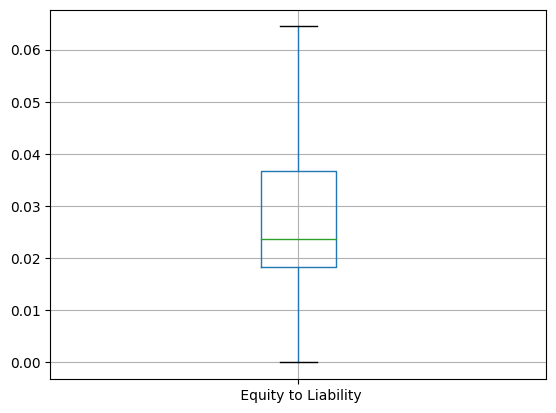

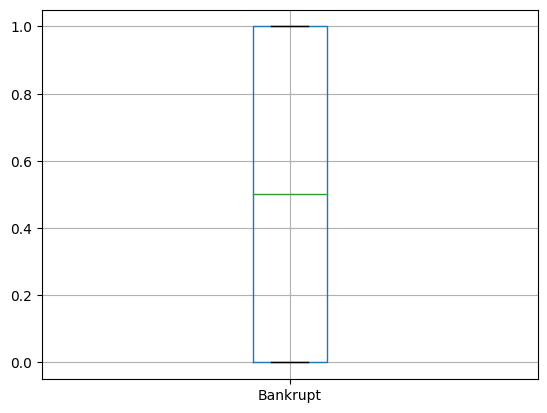

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

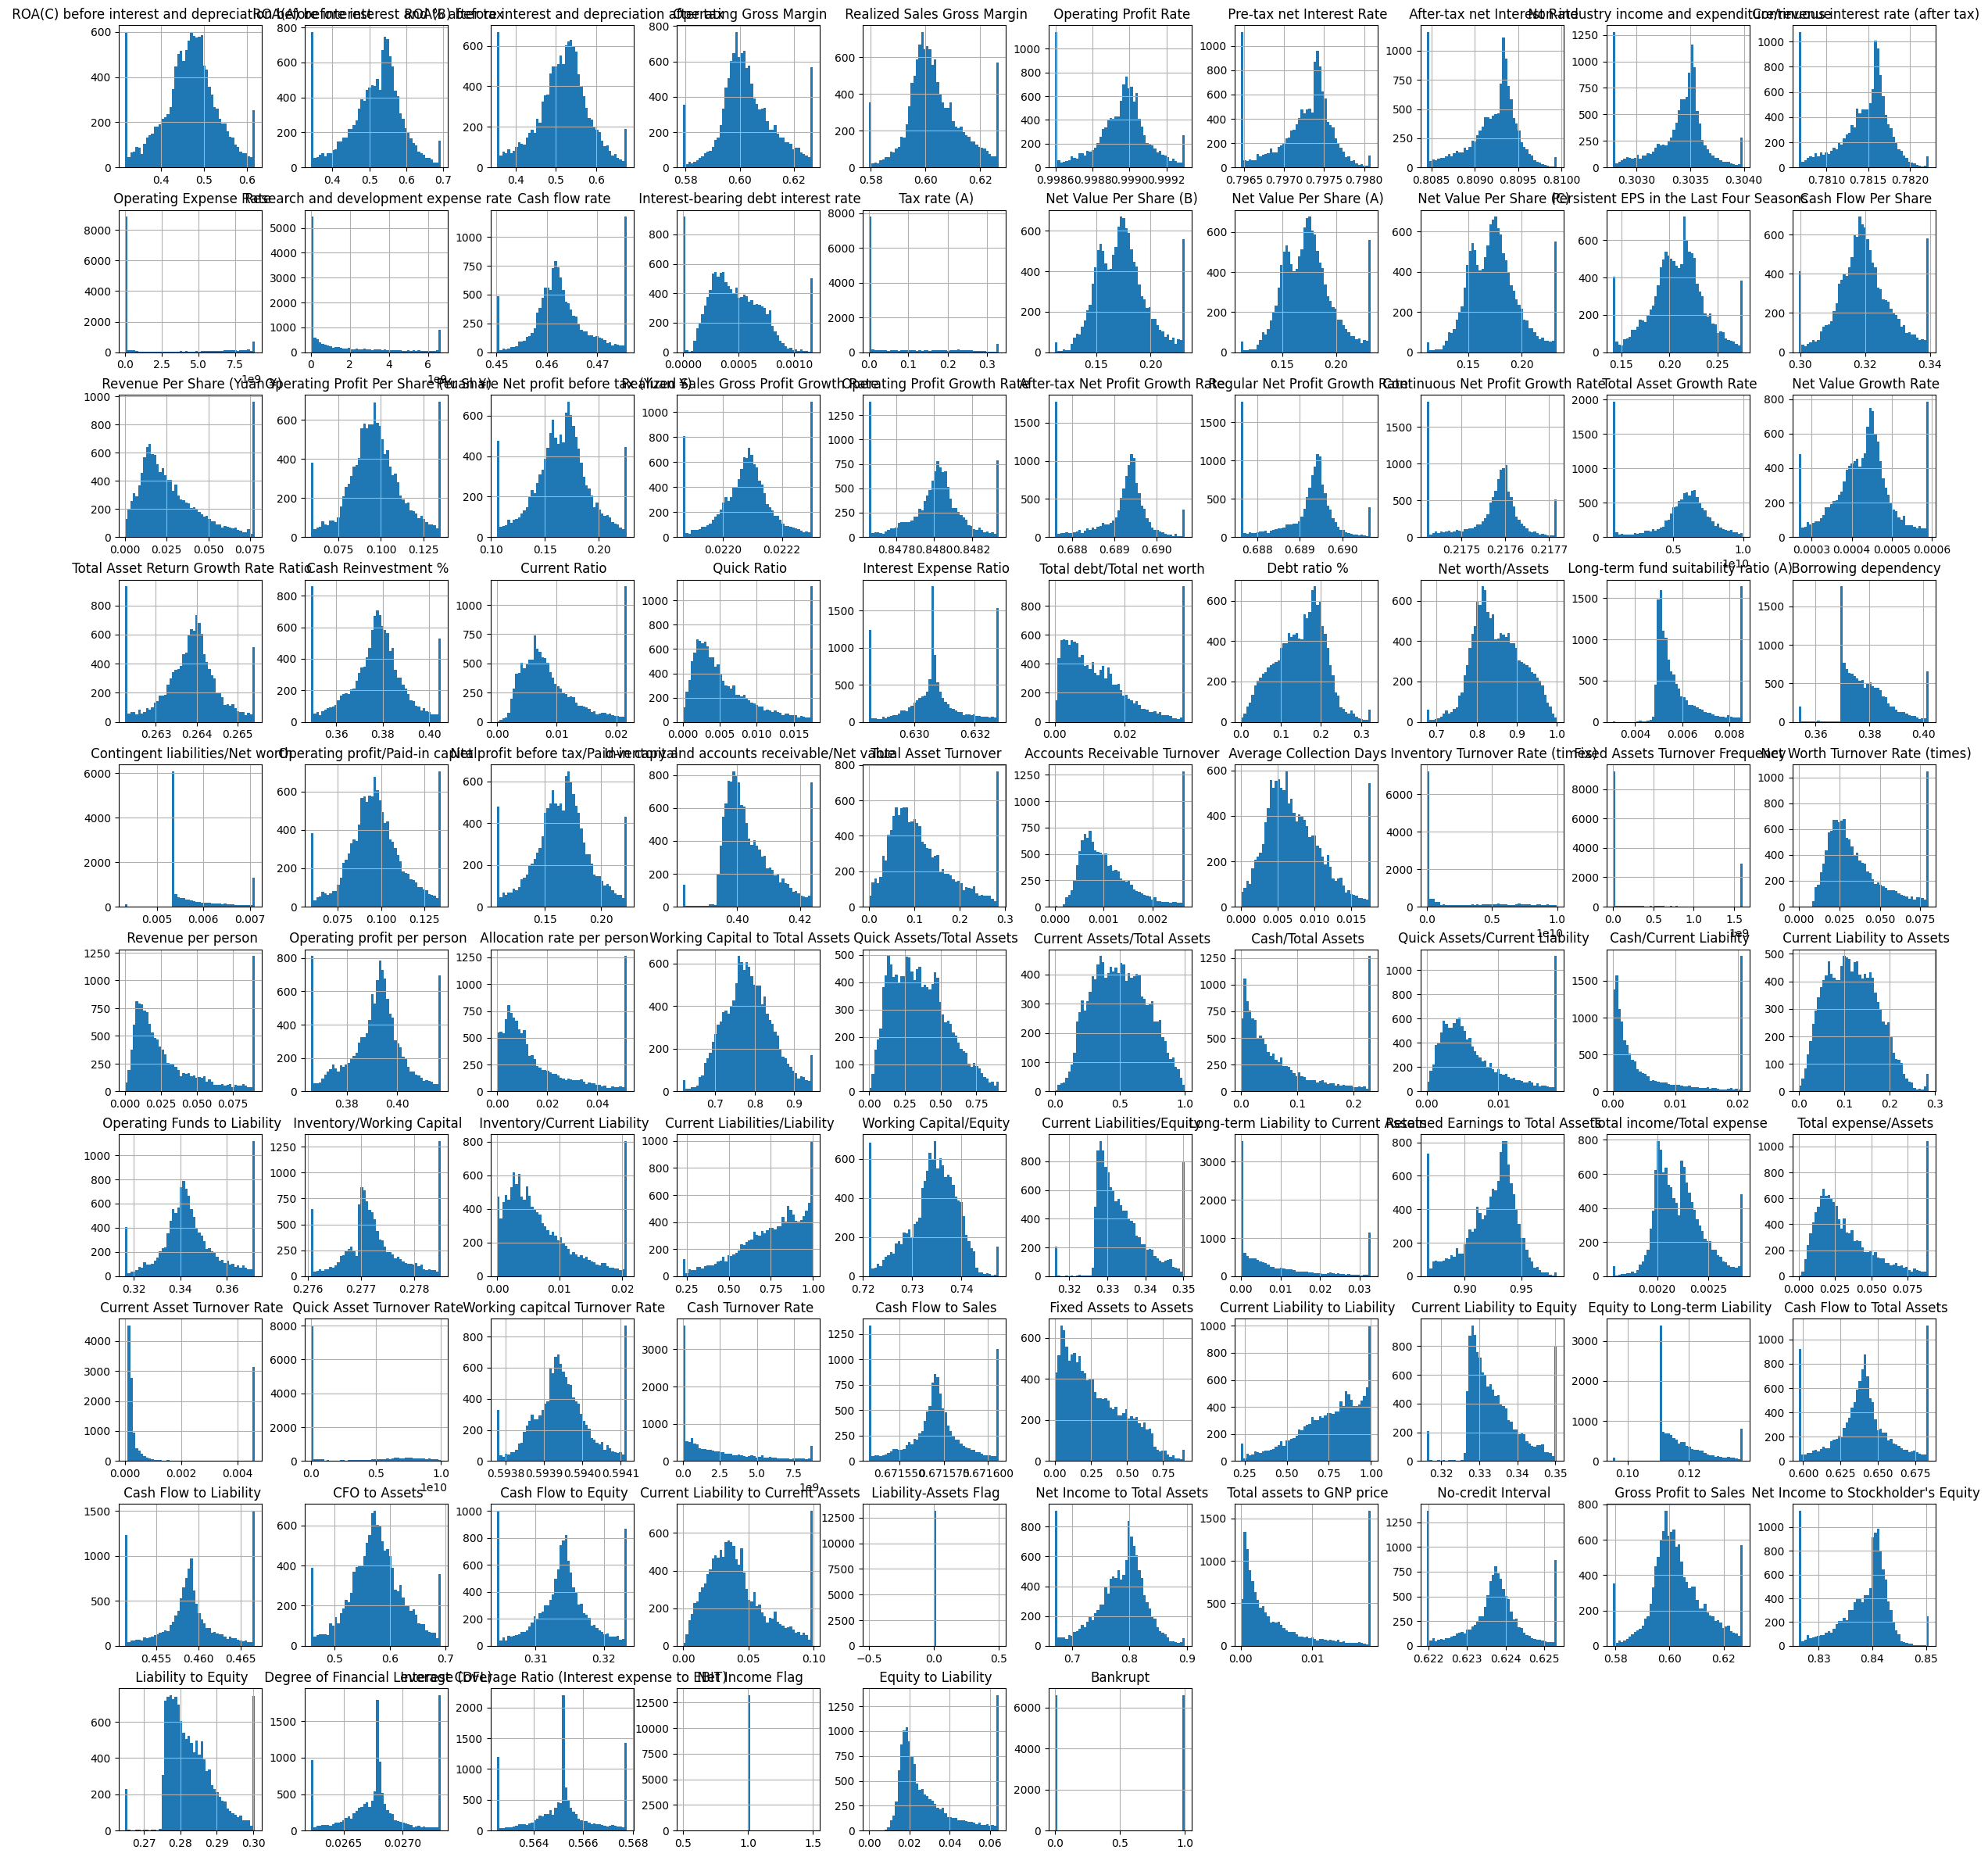

In [ ]:
# histogram of each features
df.hist(bins=50, figsize=(30,30))
plt.show()

In [ ]:
X = df.drop('Bankrupt', axis=1).reset_index(drop=True)
y = df['Bankrupt'].reset_index(drop=True)

In [ ]:
tf = StandardScaler().fit_transform(X)
scaledf = pd.DataFrame(tf, columns=X.columns)
scaledf['Bankrupt'] = y
scaledf

ROA(C) before interest and depreciation before interest  \
0                                              -1.425268          
1                                              -0.018161          
2                                              -0.592131          
3                                              -0.986004          
4                                              -0.007179          
...                                                  ...          
13193                                          -2.203874          
13194                                          -2.205590          
13195                                          -1.803189          
13196                                           0.053154          
13197                                          -0.048114          

        ROA(A) before interest and % after tax  \
0                                    -1.181554   
1                                     0.310012   
2                                    -0.203607   
3                                    -0.829379   
4                                     0.312869   
...                                        ...   
13193                                -1.762560   
13194                                -2.138438   
13195                                -1.540581   
13196                                 0.039688   
13197                                -0.139001   

        ROA(B) before interest and depreciation after tax  \
0                                              -1.517766    
1                                               0.063917    
2                                              -0.569366    
3                                              -0.776900    
4                                               0.143269    
...                                                  ...    
13193                                          -1.698342    
13194                                          -2.252219    
13195                                          -1.755584    
13196                                           0.189193    
13197                                          -0.125328    

        Operating Gross Margin   Realized Sales Gross Margin  \
0                    -0.181127                     -0.183119   
1                     0.666008                      0.667601   
2                    -0.181823                     -0.192199   
3                    -1.910172                     -1.919482   
4                    -0.439162                     -0.442246   
...                        ...                           ...   
13193                 0.961730                      0.977206   
13194                -0.554442                     -0.555603   
13195                -0.212231                     -0.214354   
13196                 0.856996                      0.859397   
13197                -0.763311                     -0.767767   

        Operating Profit Rate   Pre-tax net Interest Rate  \
0                    0.178642                   -0.986021   
1                    0.037936                    0.374524   
2                   -0.498989                   -2.160982   
3                   -1.453828                   -0.765754   
4                    0.202445                    0.335588   
...                       ...                         ...   
13193               -1.049805                   -0.576954   
13194                0.269620                   -0.083879   
13195               -0.181663                   -0.702412   
13196                0.261997                   -0.333664   
13197               -0.160619                   -0.205351   

        After-tax net Interest Rate  \
0                         -1.070577   
1                          0.393944   
2                         -2.149020   
3                         -0.604910   
4                          0.402867   
...                             ...   
13193                     -0.501272   
13194                     -0.067455   
13195           

In [ ]:
xx = scaledf.drop('Bankrupt', axis=1)
yy = scaledf['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10558, 95) (10558,) (2640, 95) (2640,)


In [ ]:
x_val = X_train[-2640:]
y_val = y_train[-2640:]

In [ ]:
model = keras.Sequential()
model.add(Dense(units = 95, activation='relu', input_dim= 95)) #input layer
model.add(Dense(units = 2, activation='relu')) #hidden layer
model.add(Dense(units = 1, activation='sigmoid')) # output layer
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 95)                9120      
                                                                 
 dense_1 (Dense)             (None, 2)                 192       
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9,315
Trainable params: 9,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=30,
    validation_data=(x_val, y_val),
)

Epoch 1/30
660/660 [==============================] - 3s 3ms/step - loss: 0.5668 - accuracy: 0.8137 - val_loss: 0.4784 - val_accuracy: 0.8799
Epoch 2/30
660/660 [==============================] - 2s 3ms/step - loss: 0.4479 - accuracy: 0.8866 - val_loss: 0.4248 - val_accuracy: 0.9064
Epoch 3/30
660/660 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.9058 - val_loss: 0.3950 - val_accuracy: 0.9170
Epoch 4/30
660/660 [==============================] - 2s 2ms/step - loss: 0.3842 - accuracy: 0.9163 - val_loss: 0.3714 - val_accuracy: 0.9265
Epoch 5/30
660/660 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.9243 - val_loss: 0.3517 - val_accuracy: 0.9383
Epoch 6/30
660/660 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.9343 - val_loss: 0.3341 - val_accuracy: 0.9436
Epoch 7/30
660/660 [==============================] - 2s 3ms/step - loss: 0.3273 - accuracy: 0.9388 - val_loss: 0.3174 - val_accuracy: 0.9504
Epoch 

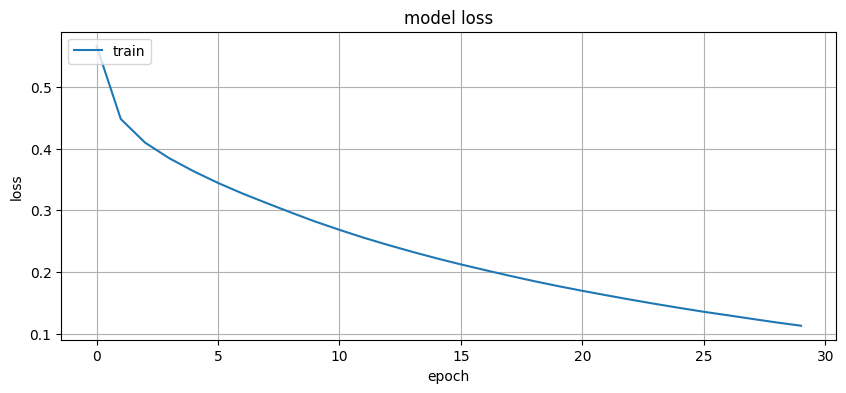

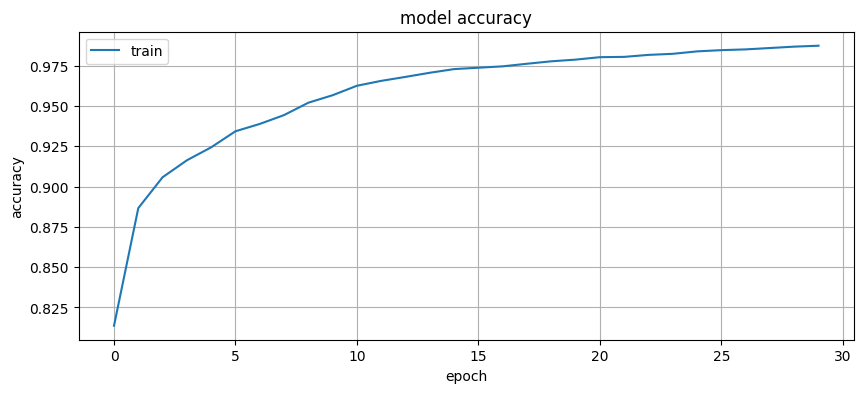

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
kelas = np.round(model.predict(X_test),0)
hasil_prediksi = np.asarray(kelas, dtype = 'int')
print(hasil_prediksi)
ypred = hasil_prediksi

83/83 [==============================] - 0s 1ms/step
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


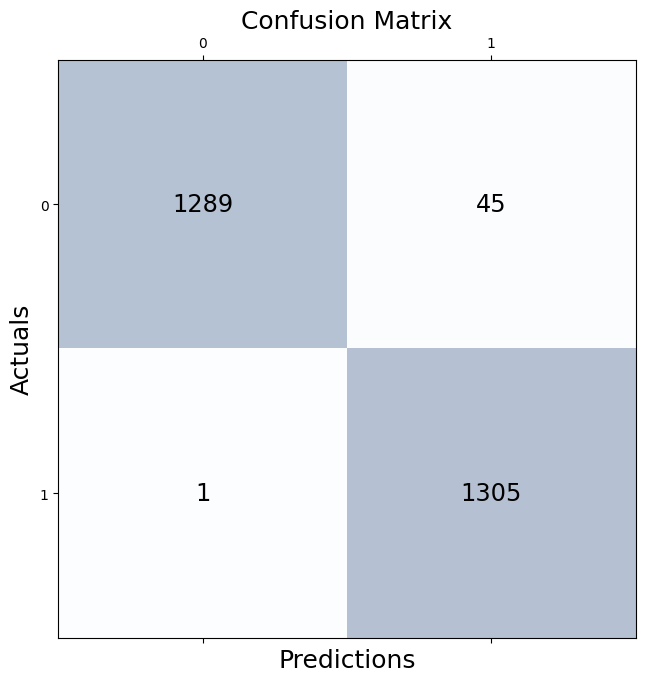

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1290
           1       1.00      0.97      0.98      1350

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=ypred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
report = classification_report(ypred, y_test)
print(report)

In [ ]:
# Generate the report
report = sv.analyze(df)

# Display the report
report.show_html("report.html")

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#RandomForestClassifier Model

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [5]:
#import data 
bankrupt = pd.read_csv('data.csv')
bankrupt.head()
bankrupt.info()
bankrupt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

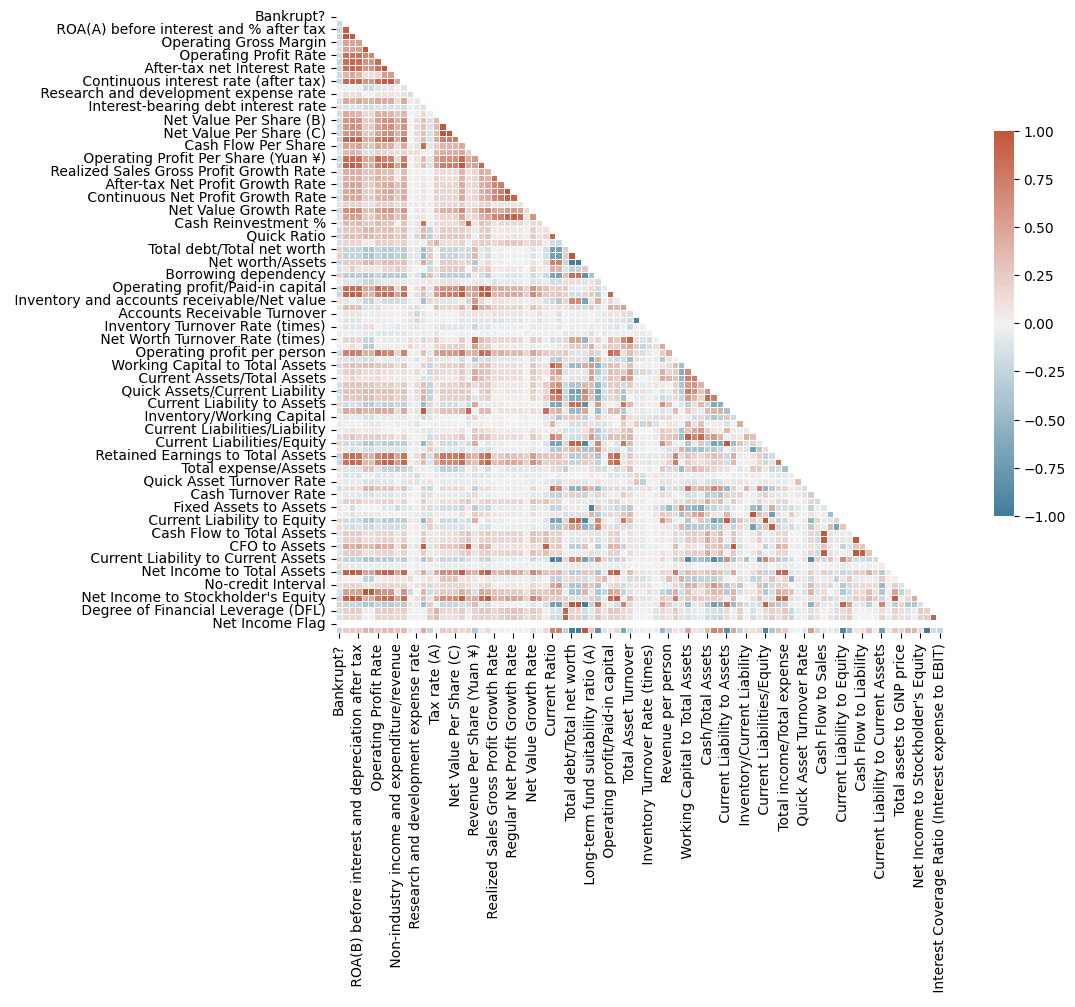

In [6]:
# Heatmap of correlation using spearman

f, ax = plt.subplots(figsize=(10, 10))
mat = bankrupt.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask,cmap =cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Split data into features and labels
X = bankrupt.drop('Bankrupt?', axis=1)
y = bankrupt['Bankrupt?']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)


# Compute the feature importance scores
importance = clf.feature_importances_

# Print the feature importance scores
for i,v in enumerate(importance):
    print(f"{X.columns[i]:<8} {v:.3f}")

 ROA(C) before interest and depreciation before interest 0.005
 ROA(A) before interest and % after tax 0.000
 ROA(B) before interest and depreciation after tax 0.037
 Operating Gross Margin 0.015
 Realized Sales Gross Margin 0.000
 Operating Profit Rate 0.000
 Pre-tax net Interest Rate 0.000
 After-tax net Interest Rate 0.000
 Non-industry income and expenditure/revenue 0.052
 Continuous interest rate (after tax) 0.000
 Operating Expense Rate 0.002
 Research and development expense rate 0.039
 Cash flow rate 0.007
 Interest-bearing debt interest rate 0.039
 Tax rate (A) 0.000
 Net Value Per Share (B) 0.010
 Net Value Per Share (A) 0.000
 Net Value Per Share (C) 0.008
 Persistent EPS in the Last Four Seasons 0.020
 Cash Flow Per Share 0.008
 Revenue Per Share (Yuan ¥) 0.000
 Operating Profit Per Share (Yuan ¥) 0.000
 Per Share Net profit before tax (Yuan ¥) 0.005
 Realized Sales Gross Profit Growth Rate 0.007
 Operating Profit Growth Rate 0.014
 After-tax Net Profit Growth Rate 0.011
 R

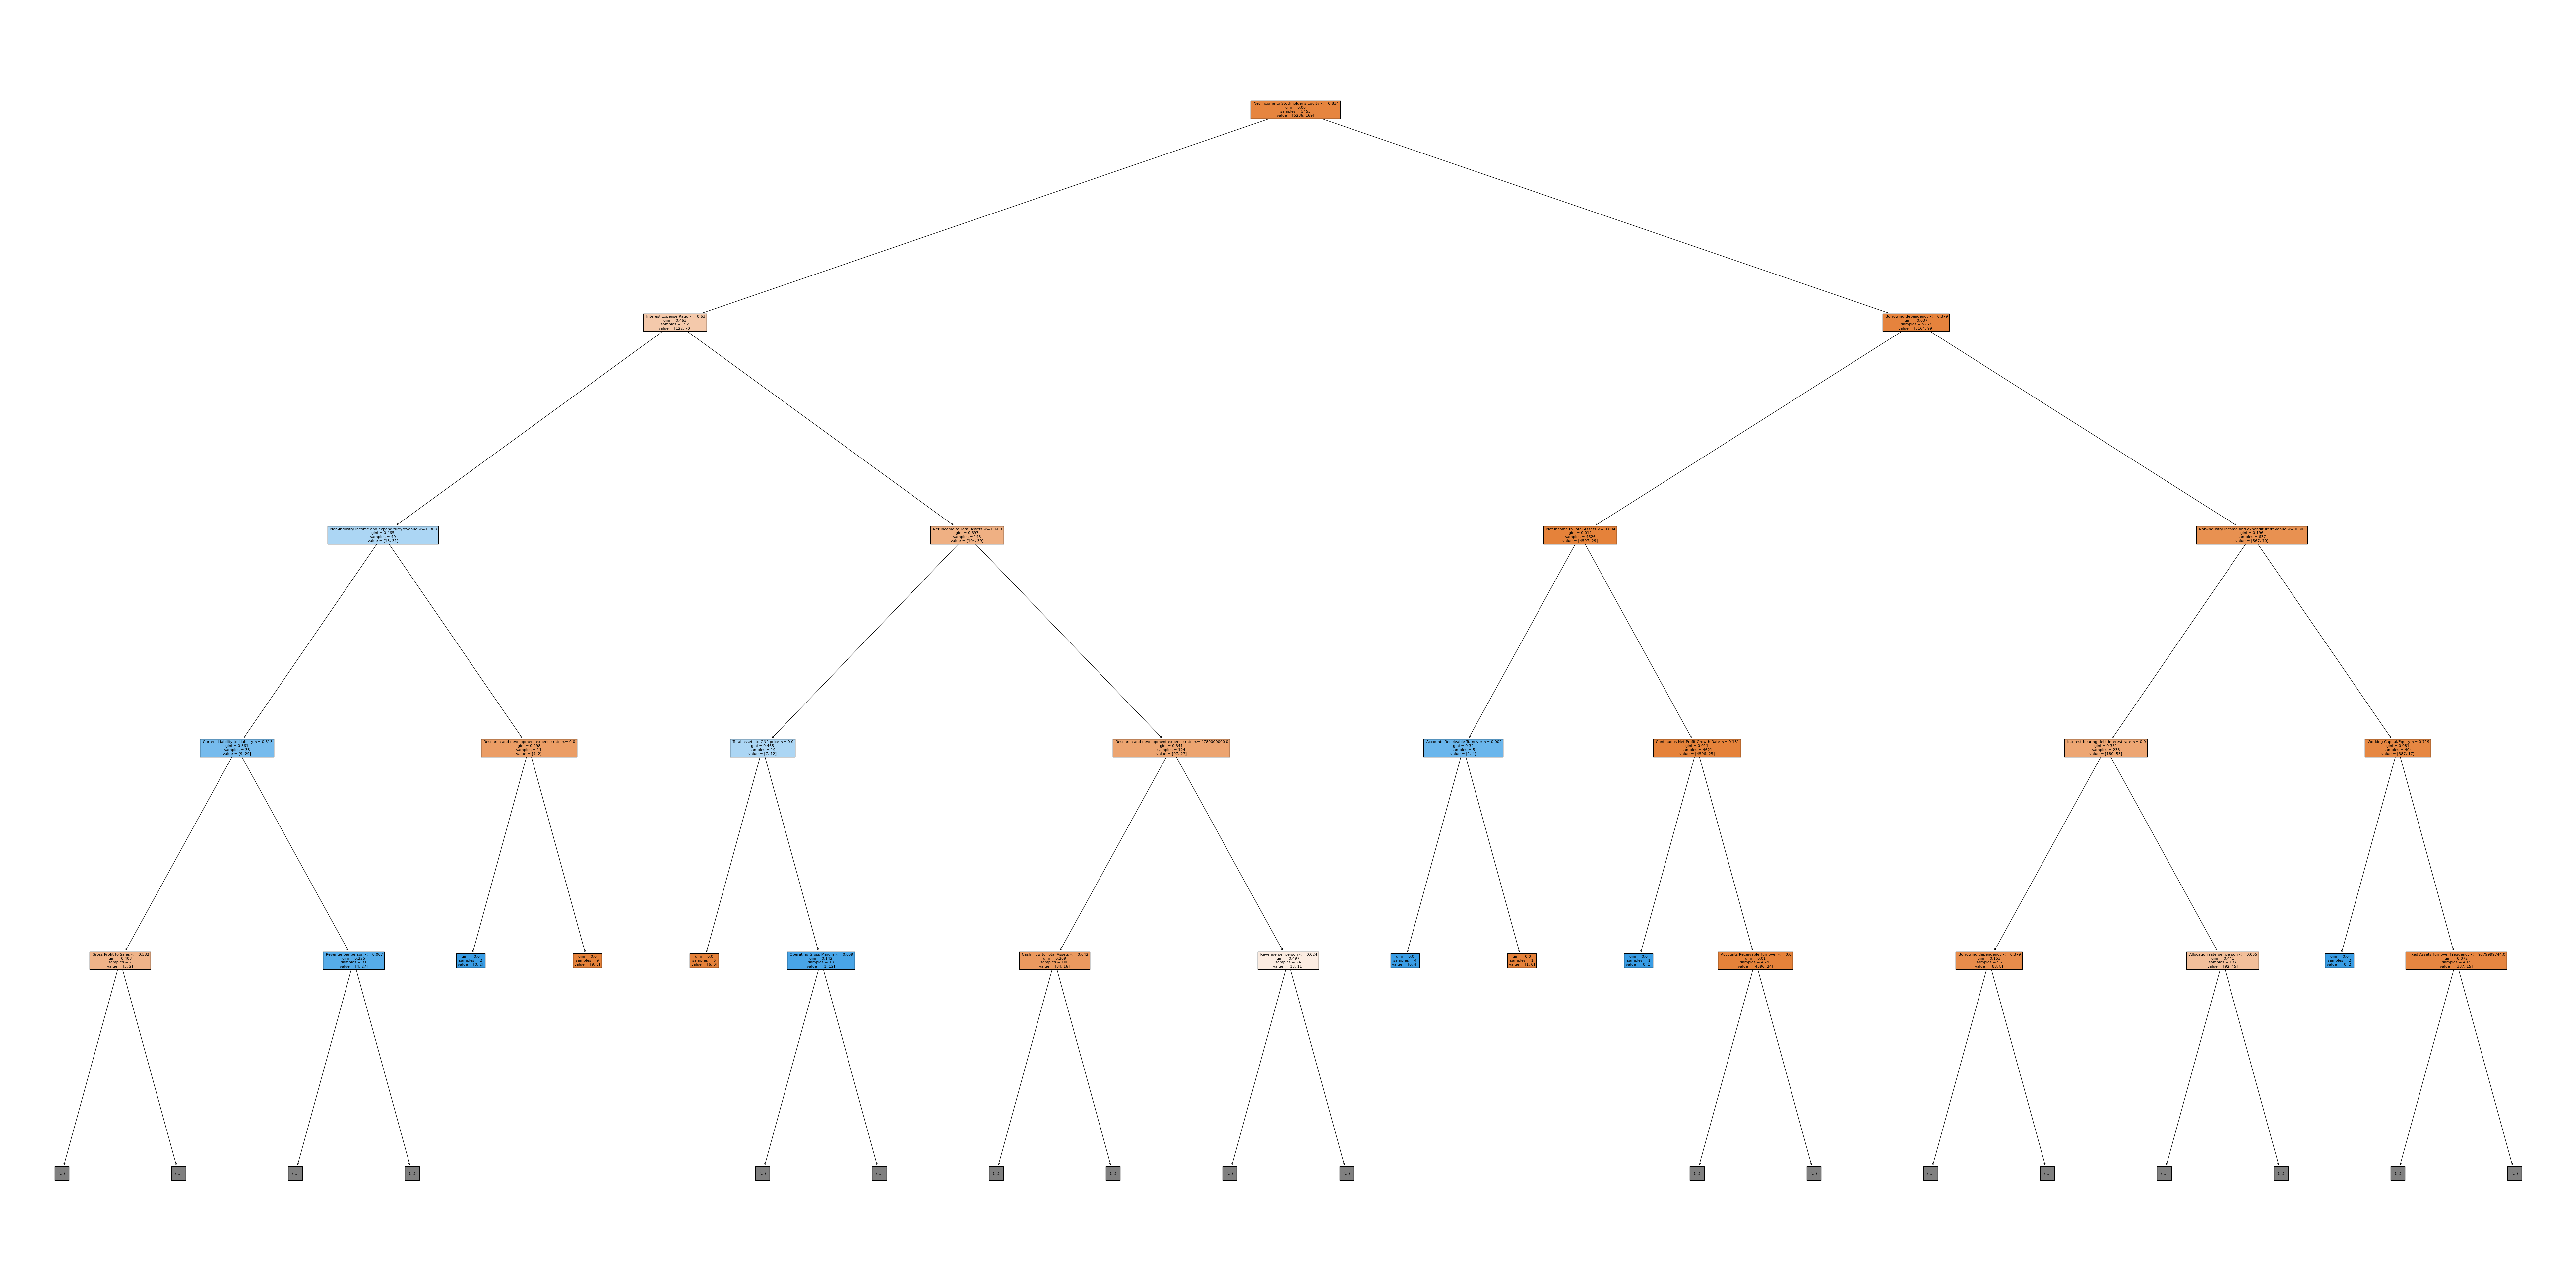

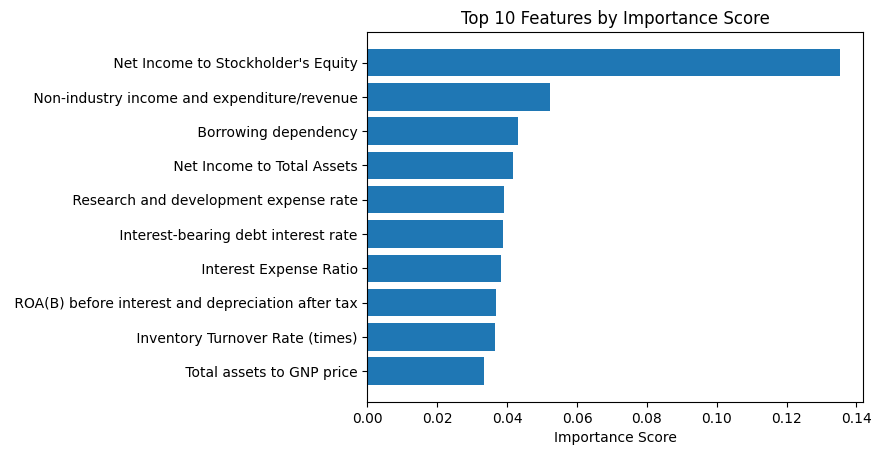

In [8]:
# Create a dictionary of feature names and importance scores
feature_importance = dict(zip(X.columns, importance))

# Sort the features by importance score in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_features = sorted_features[:10]

# Plot the decision tree
plt.figure(figsize=(100,50))
plot_tree(clf, filled=True, max_depth=4, feature_names=X.columns) 

# Visualize the top 30 features and their importance scores
fig, ax = plt.subplots()
ax.barh([f[0] for f in top_features], [f[1] for f in top_features])
ax.invert_yaxis()
ax.set_xlabel('Importance Score')
ax.set_title('Top 10 Features by Importance Score')
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model
dtc.fit(X, y)


# Compute feature importance
importance2 = dtc.feature_importances_

# Print the feature importance scores
for i,v in enumerate(importance2):
    print(f"{X.columns[i]:<8} {v:.3f}")

 ROA(C) before interest and depreciation before interest 0.000
 ROA(A) before interest and % after tax 0.010
 ROA(B) before interest and depreciation after tax 0.044
 Operating Gross Margin 0.000
 Realized Sales Gross Margin 0.003
 Operating Profit Rate 0.000
 Pre-tax net Interest Rate 0.004
 After-tax net Interest Rate 0.014
 Non-industry income and expenditure/revenue 0.016
 Continuous interest rate (after tax) 0.004
 Operating Expense Rate 0.023
 Research and development expense rate 0.000
 Cash flow rate 0.000
 Interest-bearing debt interest rate 0.044
 Tax rate (A) 0.002
 Net Value Per Share (B) 0.006
 Net Value Per Share (A) 0.007
 Net Value Per Share (C) 0.000
 Persistent EPS in the Last Four Seasons 0.005
 Cash Flow Per Share 0.000
 Revenue Per Share (Yuan ¥) 0.012
 Operating Profit Per Share (Yuan ¥) 0.009
 Per Share Net profit before tax (Yuan ¥) 0.000
 Realized Sales Gross Profit Growth Rate 0.021
 Operating Profit Growth Rate 0.011
 After-tax Net Profit Growth Rate 0.002
 R

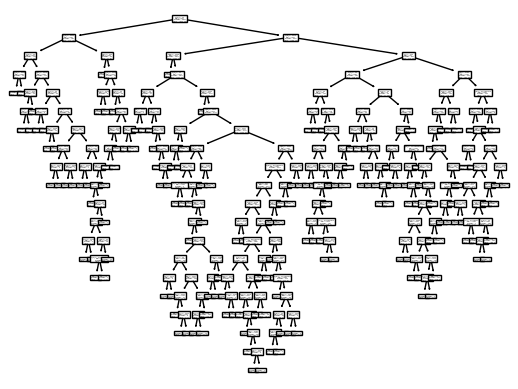

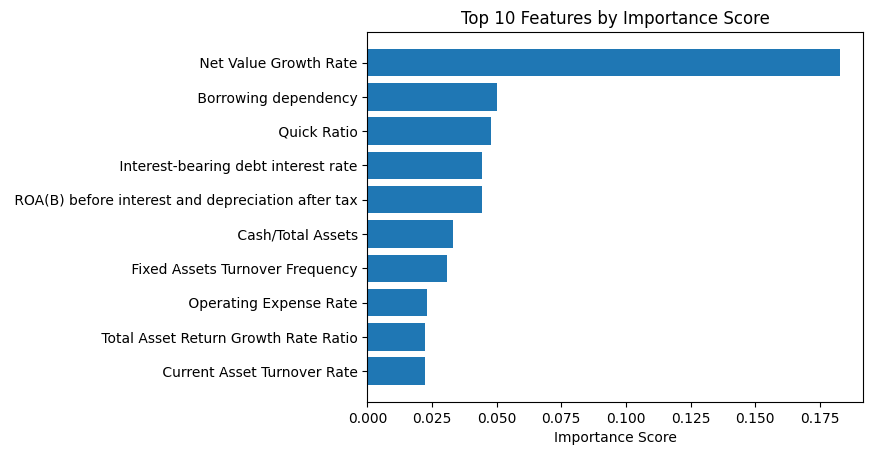

In [10]:
# Create a dictionary of feature names and importance scores
feature_importance2 = dict(zip(X.columns, importance2))

# Sort the features by importance score in descending order
sorted_features2 = sorted(feature_importance2.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_features2 = sorted_features2[:10]

# Plot the decision tree
plot_tree(dtc)

# Visualize the top 10 features and their importance scores
fig, ax = plt.subplots()
ax.barh([f[0] for f in top_features2], [f[1] for f in top_features2])
ax.invert_yaxis()
ax.set_xlabel('Importance Score')
ax.set_title('Top 10 Features by Importance Score')
plt.show()

In [11]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get the feature importances from the trained model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

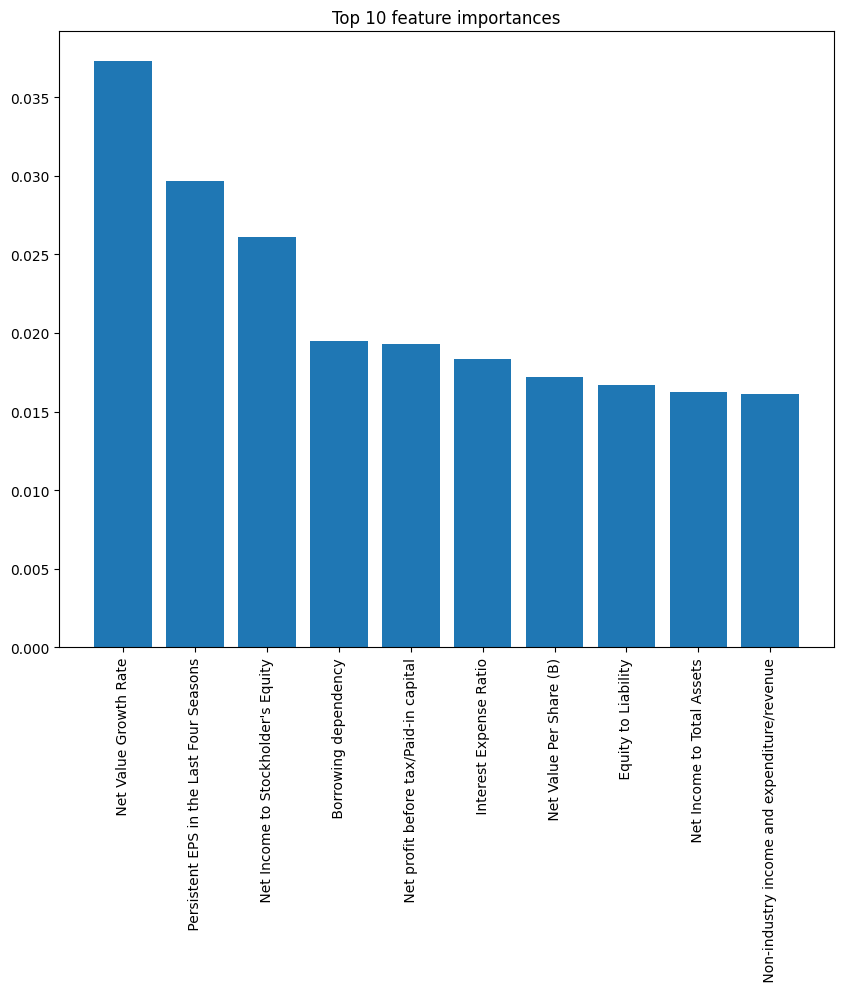

In [12]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get the feature importances from the trained model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Get the top 10 features with the highest importance score
top_n = 10
top_indices = indices[:top_n]

# Visualize the top feature importances
plt.figure(figsize=(10,8))
plt.title(f"Top {top_n} feature importances")
plt.bar(range(top_n), importances[top_indices])
plt.xticks(range(top_n), X.columns[top_indices], rotation=90)
plt.show()

In [13]:
# Create a dictionary of feature names and importance scores
feature_importance = dict(zip(X.columns, importance))

# Sort the features by importance score in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_features = sorted_features[:10]

# Print the top 10 features and their importance scores
print("Top 10 Features:")
for feature, importance_score in top_features:
    print(f"{feature}: {importance_score:.3f}")

Top 10 Features:
 Net Income to Stockholder's Equity: 0.135
 Non-industry income and expenditure/revenue: 0.052
 Borrowing dependency: 0.043
 Net Income to Total Assets: 0.042
 Research and development expense rate: 0.039
 Interest-bearing debt interest rate: 0.039
 Interest Expense Ratio: 0.038
 ROA(B) before interest and depreciation after tax: 0.037
 Inventory Turnover Rate (times): 0.036
 Total assets to GNP price: 0.033


In [14]:
# Select the top 10 features
top_features = [feature for feature, _ in top_features[:10]]

# Create a new variable with the top 10 features
new_variable = X[top_features]

# Print the new variable
print(new_variable)

       Net Income to Stockholder's Equity  \
0                                0.827890   
1                                0.839969   
2                                0.836774   
3                                0.834697   
4                                0.839973   
...                                   ...   
6814                             0.840359   
6815                             0.840306   
6816                             0.840138   
6817                             0.841084   
6818                             0.841019   

       Non-industry income and expenditure/revenue   Borrowing dependency  \
0                                         0.302646               0.390284   
1                                         0.303556               0.376760   
2                                         0.302035               0.379093   
3                                         0.303350               0.379743   
4                                         0.303475               0.375025 

In [15]:
# Assuming your label column is named "Bankrupt?"
label_column = bankrupt["Bankrupt?"]

# Concatenate the new dataset with the label column
new_variable_with_label = pd.concat([new_variable, label_column], axis=1)

In [16]:
print(new_variable)

       Net Income to Stockholder's Equity  \
0                                0.827890   
1                                0.839969   
2                                0.836774   
3                                0.834697   
4                                0.839973   
...                                   ...   
6814                             0.840359   
6815                             0.840306   
6816                             0.840138   
6817                             0.841084   
6818                             0.841019   

       Non-industry income and expenditure/revenue   Borrowing dependency  \
0                                         0.302646               0.390284   
1                                         0.303556               0.376760   
2                                         0.302035               0.379093   
3                                         0.303350               0.379743   
4                                         0.303475               0.375025 

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Split the new dataset into features (X) and the label (y)
X = new_variable
y = bankrupt['Bankrupt?']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
predictions = clf.predict(X_test)

# Print the predicted labels
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
import pandas as pd

# Load the pre-trained model
# Make sure you have the trained model file and import it here

# Define the input data
input_data = {
    " Net Income to Stockholder's Equity": [844984],
    " Non-industry income and expenditure/revenue": [98498],
    ' Borrowing dependency': [84984],
    ' Net Income to Total Assets': [849848],
    ' Research and development expense rate': [4988],
    ' Interest-bearing debt interest rate': [8484],
    ' Interest Expense Ratio': [84984],
    ' ROA(B) before interest and depreciation after tax': [9849848],
    ' Inventory Turnover Rate (times)': [8488],
    ' Total assets to GNP price': [89849]
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(input_data)

# Use the trained model to predict the outcome
prediction = clf.predict(input_df)

# Print the prediction
print(f"Prediction: {'Bankrupt' if prediction == 1 else 'Not Bankrupt'}")


Prediction: Not Bankrupt


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.025589516129032257
Root Mean Squared Error (RMSE): 0.15996723454830447
Mean Absolute Error (MAE): 0.04722140762463343
R-squared (R2): 0.28902240939026036


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.6153622149545271


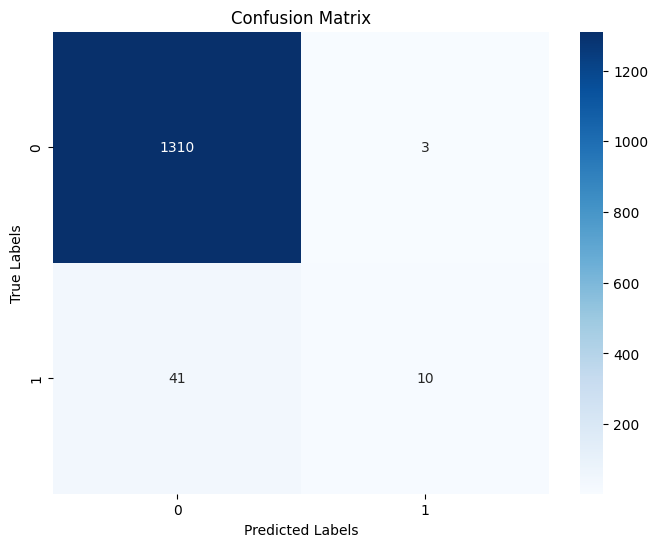

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define and train the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Define and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the models
nn_accuracy = accuracy_score(y_test, y_pred_nn)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

nn_precision = precision_score(y_test, y_pred_nn)
rf_precision = precision_score(y_test, y_pred_rf)

nn_recall = recall_score(y_test, y_pred_nn)
rf_recall = recall_score(y_test, y_pred_rf)

nn_f1 = f1_score(y_test, y_pred_nn)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation results
print("Neural Network:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1)
print()
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Neural Network:
Accuracy: 0.5806451612903226
Precision: 0.02376599634369287
Recall: 0.2549019607843137
F1 Score: 0.04347826086956522

Random Forest:
Accuracy: 0.968475073313783
Precision: 0.7857142857142857
Recall: 0.21568627450980393
F1 Score: 0.3384615384615385
